**Декомпозиция:**
1. Обзор данных;
2. Предобработка данных;
3. Исследование данных;
4. Выводы.






In [1]:
# импортируем библиотеки

import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")

## 1. Обзор данных

In [2]:
# получим данные


try:
    data = pd.read_csv('link to the file', sep='\t')
except:
    data = pd.read_csv('link to the file', sep='\t')

In [3]:
# выведем на экран

print('Архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет:')

data.head()

Архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет:


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
# выведем общую информацию о таблице

print('Общая информация о таблице:')
print()
data.info()

Общая информация о таблице:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  obj

#### Согласно полученной информации мы видим:

1. в таблице **23 699** строк и **22** столбца;
2. есть **пропущенные значения** в столбцах;
3. некоторые **названия в столбцах требуют изменений**;
4. в некоторых столбцах лучше **изменить тип данных**;
5. на данный момент присутствуют следующие типы данных: bool, float64, int64, object.


<a id='data_description'></a>

**Описание данных:**
* `total_images` — число фотографий квартиры в объявлении
* `last_price` — цена на момент снятия с публикации
* `total_area` — площадь квартиры в квадратных метрах (м²)
* `first_day_exposition` — дата публикации
* `rooms` — число комнат
* `ceiling_height` — высота потолков (м)
* `floors_total` — всего этажей в доме
* `living_area` — жилая площадь в квадратных метрах (м²)
* `floor` — этаж
* `is_apartment` — апартаменты (булев тип)
* `studio` — квартира-студия (булев тип)
* `open_plan` — свободная планировка (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `balcony` — число балконов
* `locality_name` — название населённого пункта
* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)



#### Вывод: 

В каждой строке таблицы содержится информация о квартире, часть столбцов описывает её характеристику, другая часть описывает её расположение. Первую часть вписывает сам пользователь самостоятельно, а вторая часть заполняется автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. Ещё присутствует временная информация: дата размещения и снятия публикации.


## 2. Предобработка данных

* 2.1: Приведем название столбцов к правильному регистру;
* 2.2: Определим и изучим пропущенные значения;
* 2.3: Приведем данные к нужным типам.
* 2.4: Избавимся от дубликатов в данных.

### 2.1: Приведем название столбцов к правильному регистру

Мы заметили, что некоторые названия столбцов лучше привести к другому регистру:
1. `cityCenters_nearest` - переименовать в **`city_сenters_nearest`**;
2. `parks_around3000` - переименовать в **`parks_around_3000`**;
3. `ponds_around3000` - переименовать в **`ponds_around_3000`**.

Давайте переименуем эти слобцы и приведем их к змеиному регистру.






In [5]:
# переменуем столбцы 
# выведем название столбцов на экран для проверки

data = data.rename(columns={
    'cityCenters_nearest': 'city_сenters_nearest',
    'parks_around3000': 'parks_around_3000',
    'ponds_around3000': 'ponds_around_3000'    
}
)

data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_сenters_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

### 2.2: Определим и изучим пропущенные значения

Мы выяснили, что в данных есть пропущенные значения, давайте узнаем в каких столбцах и сколько пропущенных значений. Изучим их и постораемся заполнить.








In [6]:
# подсчитаем пропущенные значения для каждого столбца
# подсчитаем процент пропущенных данных

print('Количество пропущенных данных по столбцам:')
print(data.isna().sum())
print()
print('Процент пропущенных данных по столбцам:')
print()
print(data.isna().sum() / len(data) * 100)


Количество пропущенных данных по столбцам:
total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_сenters_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Процент пропущенных данных по столбцам:

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
livi

Итак, давайте взглянем подробнее:
* **9 195** пропущенных значений в столбце `ceiling_height`(высота потолка) и это примерно **38%** пропусков от всех данных;
* **86** пропущенных значений в столбце `floors_total`(всего этажей в доме) и это меньше **1%** пропусков от всех данных;
* **1 903** пропущенных значений в столбце `living_area`(жилая площадь) и это примерно **8%** пропусков от всех данных;
* **20 924** пропущенных значений в столбце `is_apartment`(аппартаменты да/нет) и это примерно **88%** пропусков от всех данных;
* **2 278** пропущенных значений в столбце `kitchen_area`(площадь кухни) и это примерно **10%** пропусков от всех данных;
* **11 519** пропущенных значений в столбце `balcony`(число балконов) и это примерно **49%** пропусков от всех данных;
* **49** пропущенных значений в столбце `locality_name`(название населенного пункта) и это менее **1%** пропусков от всех данных;
* **5 542** пропущенных значений в столбце `airports_nearest`(расстояние до аэропорта) и это примерно **23%** пропусков от всех данных;
* **5 519** пропущенных значений в столбце `city_сenters_nearest`(расстояние до центра) и это примерно **23%** пропусков от всех данных;
* **5 518** пропущенных значений в столбце `parks_around_3000`(число парков в радиусе 3 км.) и это примерно **23%** пропусков от всех данных;
* **15 620** пропущенных значений в столбце `parks_nearest`(расстояние до ближайшего парка) и это примерно **62%** пропусков от всех данных;
* **5 518** пропущенных значений в столбце `ponds_around_3000`(число водоемов в радиусе 3 км) и это примерно **23%** пропусков от всех данных;
* **14 589** пропущенных значений в столбце `ponds_nearest`(расстояние до ближайшего водоема) и это примерно **62%** пропусков от всех данных;
* **3 181** пропущенных значений в столбце `days_exposition`(сколько дней было опубликовано объявления до снятия) и это примерно **13%** пропусков от всех данных.












Мы видим достаточно много пропущенных значений, давайте разберем их по отдельности и заполним пропуски, где это уместно.

#### Разберем столбец `ceiling_height`

**Описание**: высота потолков (м).

Определить точную высоту для каждого объявления не представляется возможным, поэтому я предлагаю заполнить пропуски на **[стандартную высоту потолка в квартирах](https://www.ivd.ru/stroitelstvo-i-remont/potolok/standartnaya-vysota-potolkov-v-kvartire-kakoj-ona-byvaet-i-kak-ee-izmenit-42011)**, которая составляет **от 2,5 до 3,2 метров** в зависимости от года строительства и типа дома. 

Диапазон сократили, для выбора предлагаю узнать медиану и среднее арифметическое значение высоты потолков.

In [7]:
# расчитаем медиану и среднее арифметическое для столбца 'ceiling_height'

print('''
Среднее арифметическая высота потолка составляет: {0};
Медиана высоты потолка составляет: {1}
'''.format(data['ceiling_height'].mean(), data['ceiling_height'].median()))


Среднее арифметическая высота потолка составляет: 2.77149889685604;
Медиана высоты потолка составляет: 2.65



Поскольку мы не знаем ни тип дома, ни год постройки, предлагаю заполнить высоту потолков значением **2,7 метра** - это значение попадает в диапазон высоты потолков, и является значением между медианой и средним арифметическим.


In [8]:
# заполним пропуски столбца 'ceiling_height' высотой 2,7 м.

data['ceiling_height'] = data['ceiling_height'].fillna(2.7)

#### Разберем столбец `floors_total`.

**Описание**: всего этажей в доме.

В данонном столбце меньше **1% пропусков** от всех данных и определить сколько этажей в доме нам не представляется возможным, мы конечно можем заполнить пропуски по этажности самой квартиры, но это будет приблизительно, поэтому предлагаю не заполнять пропущенные значения в этом столбце и перейти к следующему.

<a id='living_area'></a>

#### Разберем столбец `living_area`.

**Описание**: жилая площадь в квадратных метрах (м²).

В данонном столбце примерно **8%** пропусков от всех данных, не так уж и много, но здесь мы хотя бы можем просчитать примерное значение, давайте обратимся к [технико-экономическим показателям жилых зданий ](http://spravkidoc.ru/news/texniko-ekonomicheskie-pokazateli-zhilyx-zdanij.html). Мы выяснили, что  о качестве планировки даёт представление соотношение жилых и вспомогательных помещений, выраженное коэффициентом, оптимальная величина которого находится в пределах **0.6 — 0.7**.


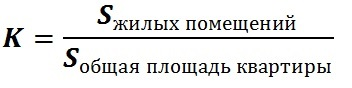


Мы выяснили, как нам рассчитать жилую площадь: **(`total_area` * K(коэф. соотношения помещений) - `kitche_area`)**.

Сделаем 2 среза данных, проверим нет ли пропусков и в других двух столбцах, которые потребуются для расчета общей площади.

In [9]:
# сделаем два среза данных, что посмотреть сможем ли мы применить формулу расчета общей площади

print(len(data.query('living_area.isna() and total_area.isna()')))
print(len(data.query('living_area.isna() and kitchen_area.isna()')))

0
1464


У нас много одновременно повторяющихся пропусков между столбцами `living_area` и `kitchen_area`, это помешает нам расчитать общую площадь.

**Сперва надо заполнить пропуски в столбце `kitchen_area`**, я предлагаю операться на [нормативную площадь помещений квартиры](https://www.pereplanirovkamos.ru/normativnaya-ploshchad-pomeshcheniy-kvartiry.html) при которых размер кухни составляет:
* 6 м² и 5 м² для кухни-ниши для 1 к.кв.;
* 8 м² и 6 м² для кухни-ниши для 2 к.кв. и более.

Давайте изучим нашу таблицу и посмотрим, какая площадб кухни у нас, построим гистограмму:

Text(0, 0.5, 'количество квартир')

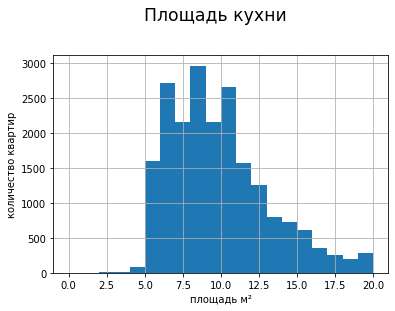

In [10]:
# построим гистограмму по столбцу `kitchen_area` и узнаем какая площадь доминирует у нас в данных 

data['kitchen_area'].hist(bins=20, range=(0,20))

plt.suptitle('Площадь кухни', x=0.5, y=1.05, ha='center', fontsize='xx-large')
plt.xlabel('площадь м²')
plt.ylabel('количество квартир')


Мы видим, что доминирует площадь **8** м², значит мы можем заполнить пропуски столбца `kitchen_area` этой величиной, но не стоит забывать что данное значени велико для 1 к.кв. или студий, для этих случаев размер кухни составляет **6** м². 

Давайте подсчитаем, в каких квартирах у нас пропуски по площади кухни.

In [11]:
# сделаем сводную таблицу по срезу данных, и подсчитаем в каких квартирах нет данных по площади кухни

data.query('kitchen_area.isna()').pivot_table(index='rooms', values='total_images', aggfunc='count')

,total_images
rooms,
0,197
1,834
2,654
3,434
4,99
5,41
6,8
7,7
8,3


**Преобладают значения у 1 к.кв. и 2 к.кв.**, предлагаю заполнить площадь кухни следующим образом:
* если количество комнат **<= 1** то площадь кухни будет составлять **6 м²**;
* если количество комнат **>= 2** то площадь кухни будет составлять **8 м²**.

#### Заполним пропущенные значения в столбце `kitche_area`.

In [12]:
# уважаемый ревьюер заранее прощу прощение, но я не очень опытен, и думаю, что путь которым я заполню пропуски в `kitchen_area`
# будет неправильный, ну или точнее немного замысловатым :)
# Итак:
# 1) сначала я заполню пропуски значением 99999 - для того, чтобы в функции которую я напишу, мы могли обратиться к этим 
# пропускам
# 2) напишу функцию под названием kitchen_area которая будет менять значения 99999 на 6 или 8 
# в зависимости от количества комнат в квартире
# 3) применим функцию к столбцу `kitchen_area`
# 4) выведим на экран количество пропущенных значний в столбце для проверки функции


data['kitchen_area'] = data['kitchen_area'].fillna('99999')

def kitchen_area(row):
    rooms = row['rooms']
    kitchen_area = row['kitchen_area']
    
    if kitchen_area == '99999':
        if rooms <= 1:
            return 6
        if rooms >= 2:
            return 8
    else:
        return kitchen_area
    
data['kitchen_area'] = data.apply(kitchen_area, axis=1)    
print('''
Количиство пропущенных значений в столбце "kitchen_area": {0}
'''.format(data['kitchen_area'].isna().sum()))



Количиство пропущенных значений в столбце "kitchen_area": 0



Теперь мы можем заполнить столбец `living_area` по [формуле](#living_area): **(`total_area` * K(коэф. соотношения помещений) - `kitche_area`)**.


**Давайте заполним пропуски в столбце `living_area`**.

In [13]:
# уважаемый ревьюер заранее прощу ещё раз :) прощение, но я не очень опытен, и думаю, 
# что путь которым я заполню пропуски в `living_area` будет неправильный, ну или точнее немного замысловатым :)
# Итак:
# 1) сначала я заполню пропуски значением 99999 - для того, чтобы в функции которую я напишу, мы могли обратиться к этим 
# пропускам
# 2) напишу функцию под названием living_area которая будет менять значения 99999 на результат нашей формулы
# 3) применим функцию к столбцу `living_area`
# 4) выведим на экран количество пропущенных значний в столбце для проверки функции

data['living_area'] = data['living_area'].fillna(99999)

def living_area(row):
    living_area = row['living_area']                     # жилая площадь (пустые значения здесь = 99999)
    k = 0.7                                              # коэффициент соотношение жилых и вспомогательных помещений
    kitchen_area = row['kitchen_area']                   # площадь кухни
    total_area = row['total_area']                       # общая площадь
    
    if living_area == 99999:
        return (total_area * k) - kitchen_area
    else:
        return living_area
    
data['living_area'] = data.apply(living_area, axis=1)   

print('''
Количиство пропущенных значений в столбце "living_area": {0}
'''.format(data['living_area'].isna().sum()))



# было чуть больше 130 значений, где сумма площади кухни и жилой зоны превышала общую
# решил исправить при помощи where()
 

data['living_area'] = (
    data['living_area']
    .where(data['living_area'] + data['kitchen_area'] <=  data['total_area'],
          data['total_area'] - data['kitchen_area'])
                                   
                      )

print('Информация о квартирах, где площадь сумма площадей кухни и жилой больше площади общей:')
data.query('living_area + kitchen_area > total_area')


Количиство пропущенных значений в столбце "living_area": 0

Информация о квартирах, где площадь сумма площадей кухни и жилой больше площади общей:


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
551,8,3100000.0,31.59,2018-03-08T00:00:00,1,2.7,19.0,22.31,2,NaN,...,9.28,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,70.0


Мы заполнили пропущенные значения, и проверили соотношений всех 3-х площадей, все сходится можем двигатся дальше.

#### Разберем столбец `is_apartment`.

**Описание**: апартаменты (булев тип).

Согласно [описанию данных](#data_description) в некоторых столбцах мы имеем булев тип, т.е. варианты ответа да или нет, поэтому можем предположить, что в столбце `is_apartment`, значние 1 - говорит, что это аппартаменты, а 0 - подразумевает, что нет. Иными словами, пользователь при заполнении информации может попросту пропустить эти строки, если это не аппартаменты - поэтому все пропуски будем считать за - 0. Но cогласно общей информации о таблице данный столбец имеет тип - object. Давайте выведим на экран уникальные данные этого слобца и изучим их.

In [14]:
# выведим уникальные данные столбца 'is_apartment'
# функцией value_counts() подсчитаем значения в столбце 'is_apartment', чтобы потом сравнить их количество

print('Уникальные значения столбца "is_apartament":')
display(data['is_apartment'].unique())
print()
print('Количество уникальных значений столбца "is_apartament":')
data['is_apartment'].value_counts()

Уникальные значения столбца "is_apartament":


array([nan, False, True], dtype=object)


Количество уникальных значений столбца "is_apartament":


False    2725
True       50
Name: is_apartment, dtype: int64

Мы видим значения булева типа: True(1) и False(0), и пропущеные значения nan. Наше предположение имеет место быть, давайте все пропуски заполним на False или попросту 0.

In [15]:
# заполним все пропуски в столбце 'is_apartment' на False
# выведим уникальные значения столбца 'is_apartment' для проверки
# функцией value_counts() подсчитаем значения в столбце 'is_apartment' и сравним с предыдущими значениями



data['is_apartment'] = data['is_apartment'].fillna(False)
print('Уникальные значения столбца "is_apartament":')
display(data['is_apartment'].unique())
print()
print('Количество уникальных значений столбца "is_apartament":')
data['is_apartment'].value_counts()

Уникальные значения столбца "is_apartament":


array([False,  True])


Количество уникальных значений столбца "is_apartament":


False    23649
True        50
Name: is_apartment, dtype: int64

Мы заполните **20 924** пропущенных значений в столбце `is_apartment`(аппартаменты да/нет) и это примерно **88%** пропусков от всех данных. 

In [16]:
print('В процентном соотношении у нас примерно получается {0}% - аппартаментов'
      .format(round(data['is_apartment'].mean() * 100)))

В процентном соотношении у нас примерно получается 0% - аппартаментов


Чтобы проверить эти данные, давайте обратимся к сервису [Яндекс Недвижимость](https://realty.yandex.ru/sankt-peterburg/kupit/kvartira/):

In [17]:
print('''
Количество объявлений о продаже квартир в Санкт-Петербурге, от 07.03.2022 года составляет {0},
из них количество аппартаментов составляет {1}. 
Таким образом:
Доля аппартаментов на рынке Санкт-Петербурга, от 07.03.2022 года составляет {2}%'''.format(36061, 1227, 1227 / 36061 * 100))


Количество объявлений о продаже квартир в Санкт-Петербурге, от 07.03.2022 года составляет 36061,
из них количество аппартаментов составляет 1227. 
Таким образом:
Доля аппартаментов на рынке Санкт-Петербурга, от 07.03.2022 года составляет 3.4025678711072906%


**3,4%** такова доля аппартаментов в Санкт-Петербурге на 07.03.2022, но стоит учитывать, что у нас:
* **во-первых** в выборке у нас меньше данных; 
* **во-вторых**, что эти данные не за 2022 год, а архив объялений. Поэтому опираясь на [информацию о развитии аппартаментов](https://cre.ru/analytics/70307) в Санкт-Петербурге мы поняли, что раньше доля аппартаментов была меньше;
* **в-третьих** надо еще учесть, что в нашей выборке данных присутствуют квартиры не только из Санкт-Петербурга, но и из Ленинградской области, там где аппартаменты не так актуальны, чем в центре Санкт-Петербурга.

Согласно вышепересисленному, считаю, что заполнить пропуске в столбце `is_apartment` на значение "False" было правильной идеей.

#### Разберем столбец `balcony`.

**Описание**:число балконов.

У нас тут **11 519** пропущенных значений в столбце и это примерно **49%** пропусков от всех данных.

Давайте взглянем на уникальные значения данного столбца.


In [18]:
# посмотрим уникальные значения столбца 

data['balcony'].sort_values().unique()

array([ 0.,  1.,  2.,  3.,  4.,  5., nan])

Максимум **5** балконов в квартире, кажется много, но такое [возможно](https://zen.yandex.ru/media/mesch4n/panelnye-doma-2000h-s-5iu-balkonami-v-kvartirah-i-bolshimi-kladovkami-61a349d025b32441cff836d4), поэтому поверим.

А вот пропущенные значения в этом столбце скорее всего означают, что балконов нет в квартире, поэтому пользователь попросту пропустил этот шаг, поэтому предлагаю заполнить все пропуски нулем.

In [19]:
# заполним пропуски нулем, опираясь на то, что нет балконов, пользователь пропускал этот шаг

data['balcony'] = data['balcony'].fillna(0)

#### Разберем столбец `locality_name`.

**Описание**: название населённого пункта.

Здесь **49** пропущенных значений и это менее **1%** пропусков от всех данных, мы можем пропустить эти данные, на результаты исследования они не сильно повлияют.

#### Разберем столбцы `airports_nearest` и `city_сenters_nearest`.

**описание**:
* `airports_nearest` - расстояние до ближайшего аэропорта в метрах (м);
* `city_сenters_nearest` - расстояние до центра города (м).



* **5 542** пропущенных значений в столбце `airports_nearest`(расстояние до аэропорта) и это примерно **23%** пропусков от всех данных;
* **5 519** пропущенных значений в столбце `city_сenters_nearest`(расстояние до центра) и это примерно **23%** пропусков от всех данных.

Мы можем здесь опираясь на столбец `locality_name` указать примерное расстояние до центра и аэропорта. Давайте для начала узнаем в каких населенных пунктах и сколько значений пропущенно в этих двух столбцах.


In [20]:
# построим сводную таблицу и узнаем в каких населенных пунктах пропущенны значения о расстоянии до центра и аэропорта и сколько

(
    data
    .query('airports_nearest.isna() and city_сenters_nearest.isna()')
    .pivot_table(index='locality_name', values='total_images', aggfunc='count')
    .sort_values('total_images', ascending=False)
    .head(20)
)

,total_images
locality_name,
посёлок Мурино,522
Всеволожск,398
Гатчина,307
деревня Кудрово,299
Выборг,237
Кудрово,173
деревня Новое Девяткино,144
Сертолово,142
Кириши,125


Давайте теперь вручную рассчитаем расстояния от населенного пункта до центра и аэропорта при помощи сервиса [Яндекс Карты](https://yandex.ru/maps/2/saint-petersburg/?ll=30.315635%2C59.938951&mode=routes&rtext=&rtt=auto&z=11):

* **посёлок Мурино** расстояние до центра: **19 700**, расстояние до аэропорта: **46 000**.
* **Всеволожск** расстояние до центра: **27 200**, расстояние до аэропорта: **49 000**.
* **Гатчина** расстояние до центра: **46 000**, расстояние до аэропорта: **33 000**.
* **деревня Кудрово** расстояние до центра: **320 000**, расстояние до аэропорта: **300 000**.
* **Выборг** расстояние до центра: **136 000**, расстояние до аэропорта: **155 000**.
* **Кудрово** расстояние до центра: **14 100**, расстояние до аэропорта: **26 600**.
* **деревня Новое Девяткино** расстояние до центра: **19 400**, расстояние до аэропорта: **46 000**.
* **Сертолово** расстояние до центра: **27 700**, расстояние до аэропорта: **57 000**.
* **Кириши** расстояние до центра: **159 000**, расстояние до аэропорта: **152 000**.
* **Сланцы** расстояние до центра: **180 000**, расстояние до аэропорта: **178 000**.
* **Волхов** расстояние до центра: **132 000**, расстояние до аэропорта: **138 000**.
* **Тосно** расстояние до центра: **58 000**, расстояние до аэропорта: **49 000**.
* **Кингисепп** расстояние до центра: **127 000**, расстояние до аэропорта: **124 000**.
* **Никольское** расстояние до центра: **47 000**, расстояние до аэропорта: **39 000**.
* **Коммунар** расстояние до центра: **42 000**, расстояние до аэропорта: **28 500**.
* **Сосновый Бор** расстояние до центра: **95 000**, расстояние до аэропорта: **91 000**.
* **Кировск** расстояние до центра: **49 000**, расстояние до аэропорта: **55 000**.
* **Отрадное** расстояние до центра: **38 000**, расстояние до аэропорта: **40 000**.
* **посёлок Бугры** расстояние до центра: **17 300**, расстояние до аэропорта: **38 000**.
* **Приозерск** расстояние до центра: **143 000**, расстояние до аэропорта: **164 000**.

Все выше значения указанны в метрах, смущает один населенный пункт - **деревня Кудрово**, это Новгородская облать и расположенна очень далеко, и мы имеем **299** пропусков, может, конечно, пользователь перепутал г. Кудрово с деревней Кудрово, но это слишком подозрительно, в любом случае проставим расстояние как до деревни Кудрово, Новгородская область. 

In [21]:
# создадим словарb distance_center и distance_airoports с расстоянием, 
# где ключем будет назнвание населенного пункта, а значениями
# расстояние до центра и до аэропорта
# заполним пропуски 
#
#
#


#data['city_сenters_nearest'] = data['city_сenters_nearest'].fillna(0)
#data['airports_nearest'] = data['airports_nearest'].fillna(0)

distance_center = {
    'посёлок Мурино' : 19700,
    'Мурино' : 19700,
    'поселок Мурино' : 19700,
    'Всеволожск' : 27200,
    'Гатчина' : 46000,
    'деревня Кудрово' : 320000,
    'Выборг' : 136000,
    'Кудрово' : 14100,
    'деревня Новое Девяткино' : 19400,
    'Сертолово' : 27700,
    'Кириши' : 159000,
    'Сланцы' : 180000,
    'Волхов' : 132000,
    'Тосно' : 58000,
    'Кингисепп' : 127000,
    'Никольское' : 47000,
    'Коммунар' : 42000,
    'Сосновый Бор' : 95000,
    'Кировск' : 49000,
    'Отрадное' : 38000,
    'посёлок Бугры' : 17300, 
    'Приозерск' : 143000, 
    
}

distance_airoports= {
    'посёлок Мурино' : 46000,
    'Мурино' : 46000,
    'поселок Мурино' : 46000,
    'Всеволожск' : 49000,
    'Гатчина' : 33000,
    'деревня Кудрово' : 300000,
    'Выборг' : 155000,
    'Кудрово' : 26600,
    'деревня Новое Девяткино' :  46000,
    'Сертолово' : 57000,
    'Кириши' : 152000,
    'Сланцы' : 178000,
    'Волхов' : 138000,
    'Тосно' : 49000,
    'Кингисепп' : 124000,
    'Никольское' : 39000,
    'Коммунар' : 28500,
    'Сосновый Бор' : 91000,
    'Кировск' : 55000,
    'Отрадное' : 40000,
    'посёлок Бугры' : 38000,
    'Приозерск' : 164000,
    
}

data['city_сenters_nearest'] = (
    data['city_сenters_nearest']
    .where(data['city_сenters_nearest'] > 0, data['locality_name'].isin(distance_center)) 
  
)

data['airports_nearest'] = (
    data['airports_nearest']
    .where(data['airports_nearest'] > 0, data['locality_name'].isin(distance_airoports)) 
  
)

print('''

Количество пропущенных значений в столбце `city_сenters_nearest`: {0};
Количество пропущенных значений в столбце `airports_nearest`: {1}.

'''.format(data['city_сenters_nearest'].isna().sum(), data['airports_nearest'].isna().sum()))

# заметил уже ниже, что тип в столбцах изменился на object, поэтому вернулся и исправил на float

data['city_сenters_nearest'] = data['city_сenters_nearest'].astype('float')
data['airports_nearest'] = data['airports_nearest'].astype('float')



Количество пропущенных значений в столбце `city_сenters_nearest`: 0;
Количество пропущенных значений в столбце `airports_nearest`: 0.




Мы **сократили** количество пропусков **вдвое**, и указали расстояния от тех населенных пунктов, в которых было больше всего пропусков. Давайте еще раз взглянем на таблицу с пропущенными значениями одновременно в обоих столбцах.

In [22]:
# построим сводную таблицу и узнаем в каких населенных пунктах пропущенны значения о расстоянии до центра и аэропорта и сколько

(
    data
    .query('airports_nearest == 0 and city_сenters_nearest == 0')
    .pivot_table(index='locality_name', values='total_images', aggfunc='count')
    .sort_values('total_images', ascending=False)
    

)

,total_images
locality_name,
деревня Старая,64
городской посёлок Янино-1,61
Санкт-Петербург,61
Шлиссельбург,57
Луга,56
...,...
поселок Красносельское,1
деревня Иссад,1
поселок Пансионат Зелёный Бор,1


Одновременно в обоих столбцах пропуски только у **322** объявлений, в остальных случаях пропуски присутствуют только в каком-то из столбцов. Я думаю, можно здесь оставить все как есть и перейти к следующему столбцу, **пропусков** слишком **мало**, и они сильно **не повлияют на исследования**, а самые частые случаи мы исправили.


#### Разберем столбцы: `parks_around_3000` и `parks_nearest`.

Эти столбцы есть смысл разбирать одновременно, ведь следуя из их [описания](#data_description) можно сделать выводы, что они взаимосвязаны между собой, например, если в радиусе 3 км. нет парков, то значение до ближайшего парка тоже должно быть равным нулю или привышать 3 км..

**Рассмотрим следующие взаимосвязи:**
* если в радиусе 3 км. нет парков, то расстояние до ближайшего парка должно равнятся нулю или быть больше 3 км.;
* если в радиусе 3 км. есть парки, то расстояние до ближайшего парка должно быть меньше 3 км.;
* если в двух столбцах одновременно пропущенны значения, то вероятно они равняются нулю, нет парков поблизости и пользователь попросту не заполнил эти данные;
* если есть пропуск только в одном столбце, то скорее всего пользователь по-ошибке пропустил эти данные, в таком случае более подробно изучим эти данные.

Выше перечисленные взаимосвязи являются логичными, поэтому, если будут результаты противоположные логичным, то мы **их будем считать аномалиями**.

Построим точечную диаграму и поищем аномалии:

<AxesSubplot:xlabel='parks_around_3000', ylabel='parks_nearest'>

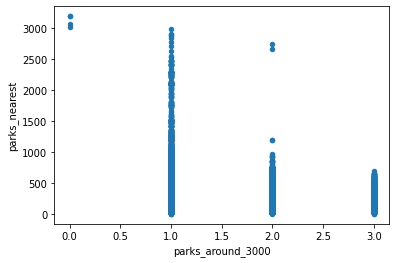

In [23]:
# построим точечную диаграмму между количеством парков в радиусе 3 км и расстоянием до этих парков

data.plot(kind='scatter', x='parks_around_3000', y='parks_nearest')

На точечной диаграмме мы видим, что **все значения логичные:**
* максимальное число парков в радиусе 3 км. не превышает значение 3 (было бы странно, если в радиусе 3 км. находилось допустим 20 парков);
* само количество парков равняется целым числам, нет никаких значений вроде 1,5 парка находится поблизости, что было бы очень странно;
* мы можем видеть, что в радиусе 3 км. количество парков равняется нулю, но есть несколько парков, расстояние до которых больше 3 км., что тоже является логичным значением.

На всякий случай давайте взглянем на срез в котором расстояние до парка больше или равно 3 км..









In [24]:
# в точечной диаграмме мы увидели, что в радиусе стоит значение 0 парков, но они видны на точечной диаграмме, взглянем на них 

data.query('parks_nearest >= 3000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
1590,3,7500000.0,70.0,2017-07-11T00:00:00,2,2.7,18.0,37.0,13,False,...,10.0,0.0,Санкт-Петербург,14878.0,9791.0,0.0,3064.0,1.0,264.0,4.0
10959,9,3000000.0,31.1,2017-03-21T00:00:00,1,2.7,5.0,17.7,2,False,...,5.5,0.0,Санкт-Петербург,14821.0,9734.0,0.0,3190.0,1.0,431.0,234.0
19208,17,14950000.0,187.0,2017-10-12T00:00:00,5,3.0,2.0,80.0,2,False,...,17.0,1.0,Санкт-Петербург,36805.0,8656.0,0.0,3013.0,3.0,537.0,49.0
19430,9,3900000.0,30.5,2018-02-22T00:00:00,1,2.6,5.0,16.5,1,False,...,5.5,0.0,Санкт-Петербург,14821.0,9734.0,0.0,3190.0,1.0,431.0,176.0


И здесь мы видим 4 строки и все парки дальше 3 км.. **Значения указанны верно!**

Не стоит забывать о том, что у нас есть пропущенные значения в этих столбцах, которые не указанны на диаграмме:
* **5 518** пропущенных значений в столбце `parks_around_3000` (число парков в радиусе 3 км.) и это примерно **23%** пропусков от всех данных;
* **15 620** пропущенных значений в столбце `parks_nearest` (расстояние до ближайшего парка) и это примерно **62%** пропусков от всех данных;
 
Мы говорили ранее, что **логично предположить** то, что если **радиус парков равняется нулю или пропущено**, то **и расстояние до ближайшего парка равняется нулю**. Не стоит забывать, что мы рассматриваем объявления о продаже квартир, поэтому такой фактор как наличие рядом парка или нескольких, может положительно повлиять на продажу, следовательно:
* если рядом присутствует парк, пользователь обязательно на это укажет, если только не пропустит эти данные случайно, но пропустить сразу два столбца, тоже странно, но возможно конечно :) ;
* пользователь не стал указывать расстояние до парка, которое больше 3 км., видимо по той причине, что расстояние он посчитал слишком большим, значит и мы будем считать что поблизости парков нет.

Давайте изучим срезы данных, где есть пропуски сразу в обоих случаях:


In [25]:
# сделаем срез где пропуска есть одновременно в обоих столбцах (расстояния и количестве парков)

data.query('parks_around_3000.isna() and parks_nearest.isna()').head()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.70,12.0,14.40,5,False,...,9.10,0.0,городской посёлок Янино-1,0.0,0.0,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.70,27.0,15.43,26,False,...,8.81,0.0,посёлок Мурино,1.0,1.0,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,2.70,5.0,30.00,5,False,...,9.00,0.0,Сертолово,1.0,1.0,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,False,...,11.00,2.0,деревня Кудрово,1.0,1.0,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,2.70,9.0,16.96,2,False,...,6.00,0.0,Коммунар,1.0,1.0,NaN,NaN,NaN,NaN,63.0


Мы видим **5 518** строк, это значение равно пропущенным значениям в столбце `parks_around_3000` (число парков в радиусе 3 км.) и это примерно **23%** пропусков от всех данных, следовательно если заменим на ноль, то избавимся от пропусков в данном столбце. 

Давайте заполним пропущенные значениями нулем в столбце `parks_around_3000`.

In [26]:
# заполним пропущенные значения в столбце `parks_around_3000` нулем
# выведем на экран количество пропущенных значений для проверки 

data['parks_around_3000'] = data['parks_around_3000'].fillna(0)
data['parks_around_3000'].isna().sum()

0

Мы избавились от пропущенных значений в столбце `parks_around_3000`, теперь давайте взглянем на срез данных, где есть пропущенные значения в столбце `parks_nearest`

In [27]:
# выведим столбцы где есть пропуски в расстоянии до парки и в то же время количество парков равно 0

data.query('parks_around_3000 == 0 and parks_nearest.isna()').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.7,11.0,18.60,1,False,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.7,12.0,14.40,5,False,...,9.10,0.0,городской посёлок Янино-1,0.0,0.0,0.0,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.7,26.0,10.60,6,False,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.7,24.0,31.22,22,False,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.7,27.0,15.43,26,False,...,8.81,0.0,посёлок Мурино,1.0,1.0,0.0,NaN,NaN,NaN,189.0


**15 620** строк с пропущенными значениями в столбце `parks_nearest` и все эти пропуски встречаются только тогда, когда столбец `parks_around_3000` равняется нулю, следовательно если поблизости 3 км. нет парка, то и ближайшее расстояние до него мы решили тоже считать нулевым.

Давайте заполним пропуски в столбце `parks_nearest` нулевым значением.



In [28]:
# пропущенные значения в столбце `parks_nearest` встречаются только тогда, когда количество парков равно 0, заполним пропуски 0
# выведим на экран сумму пропусков столбца `parks_nearest` для проверки

data['parks_nearest'] = data['parks_nearest'].fillna(0)
data['parks_nearest'].isna().sum()

0

Мы убрали пропущенные значения в столбцах `parks_around_3000` и `parks_nearest` опираясь на следующую логику:
* сначала мы заполнили пропущенные значения в **столбце `parks_around_3000`** в тех случаях, когда пропуски присутствовали одновреммено в двух столбцах, таким образом мы полность избавились от пропусков в столбце и заменили их на **0**;
* после этого все пропуски в **столбце `parks_nearest`** встречались только тогда, когда значения в столбце `parks_around_3000` было равно **0**, таким образом, если нет парков в радиусе 3 км., то все остальные парки мы посчитали слишком далеко и указали это значение.

#### Разберем столбцы: `ponds_around_3000` и  `ponds_nearest`.

Давайте действовать по аналогии и с парками, потому что количество пропущенных значений здесь равно, а также из [описания](#data_description) следуют такие же выводы, что между столбцами аналогичная взаимосвязь. 

Сперва построим точечную диаграмму, затем поищем аномалии. Если аномалий нет, узнаем количество пропусков одновременно в обоих столбцах и заполним эти пропуски опираясь на ту же логику, как и с парками.

<AxesSubplot:xlabel='ponds_around_3000', ylabel='ponds_nearest'>

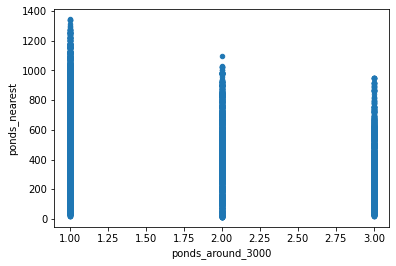

In [29]:
# построим точечную диаграмму межу расстоянием и количеством водоемов

data.plot(kind='scatter', x='ponds_around_3000', y='ponds_nearest')

Видим нормальное распределение водоемов:
* количество водоемов не большое, до 3-х на расстояние 3 км., что кажется нормальным значением;
* количество водоемов равняется целому числу, как и с парками.

Напомню, что пропущенные значения в этих столбцах равняется:
* **5 518** пропущенных значений в столбце `ponds_around_3000`(число водоемов в радиусе 3 км) и это примерно **23%** пропусков от всех данных;
* **14 589** пропущенных значений в столбце `ponds_nearest`(расстояние до ближайшего водоема) и это примерно **62%** пропусков от всех данных.

Теперь давайте узнаем сколько пропусков сразу в обоих столбцах:


In [30]:
len(data.query('ponds_around_3000.isna() and ponds_nearest.isna()'))

5518

**5 518** все повторяется как и с парками, тогда заполним на ноль пропущенные значения столбца `ponds_around_3000`.
Замем сравним сколько пропусков в столбце `ponds_nearest` при количестве водоемов в радиусе 3 км. равному нулю, если оно равняется **14 589** то заполним и этот столбец.

In [31]:
# заполним пропущенные значения на 0 в столбце 'ponds_around_3000'
# выведем количество пропущенных значений в столбце 'ponds_nearest' при условии что в радиусе водоемов нет, равно 0

data['ponds_around_3000'] = data['ponds_around_3000'].fillna(0)
len(data.query('ponds_around_3000 == 0 and ponds_nearest.isna()'))


14589

**14 589** все как и с парками, давайте заполним пропущенные значения столбца `ponds_nearest`.

In [32]:
# заполним все пропуски в столбце `ponds_nearest`
# проверим количество пропусков в таблице и заодно наши исправления

data['ponds_nearest'] = data['ponds_nearest'].fillna(0)
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total              86
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name             49
airports_nearest           0
city_сenters_nearest       0
parks_around_3000          0
parks_nearest              0
ponds_around_3000          0
ponds_nearest              0
days_exposition         3181
dtype: int64

Мы заполнили пропуски в столбцах `ponds_around_3000` и  `ponds_nearest` **по аналогии с парками**.

Теперь когда мы заполнили пропуски в столбцах которые содержали данные о парках и водоемах, давайте построим две гистограммы, ведь по логике водоемы скорее всего находятся в парках, да и пропущенные значения совпадали по своему количеству среди этих столбцов.

<AxesSubplot:>

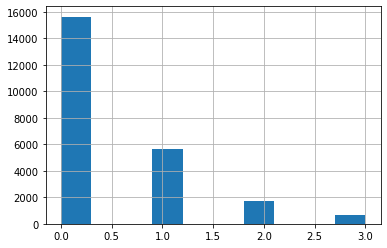

In [33]:
# построим гистограмму количества парков на расстоянии 3 км

data['parks_around_3000'].hist()

<AxesSubplot:>

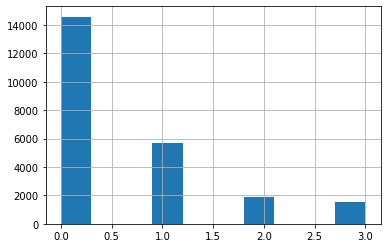

In [34]:
# построим гистограмму количества водоемов на расстоянии 3 км

data['ponds_around_3000'].hist()

Мы видим взаимосвязь между парками и водоемами, как и ранее увидили, что количество пропусков среди них примерно одинаковая. Следовательно заполнив пропущенные значения мы эту взаимосвязь не нарушили.

#### Разберем столбец `days_exposition`.

**Описание**: сколько дней было размещено объявление (от публикации до снятия).

**3 181** пропущенных значений в столбце и это примерно **13%** пропусков от всех данных. Боюсь, что здесь нам не заполнить эти данные никак. Мне кажется, что здесь пропуски связаны с тем, что пользователь попросту не снял объявление с публикации после продажи, хотя с другой стороны в Яндексе наверное рассматривали такие моменты и закрывали объявления, если они становились неактуальными или не обновлялись долгое время. 

Ещё может быть, что эти объявления были актуальны до момента архива, может они еще продавали свои квартиры и по этой причине здесь стоит пропуск.

**13%** не очень много, предлагаю оставить все как есть и двигаться дальше.

### 2.3: Приведем данные к нужным типам

Еще при обзоре данных мы заметили, что некоторые столбцы следует привести к нужному типу данных. Давайте еще раз вспомним описание данных и выведем общую информацию о таблице.

**Описание данных:**
* `total_images` — число фотографий квартиры в объявлении
* `last_price` — цена на момент снятия с публикации
* `total_area` — площадь квартиры в квадратных метрах (м²)
* `first_day_exposition` — дата публикации
* `rooms` — число комнат
* `ceiling_height` — высота потолков (м)
* `floors_total` — всего этажей в доме
* `living_area` — жилая площадь в квадратных метрах (м²)
* `floor` — этаж
* `is_apartment` — апартаменты (булев тип)
* `studio` — квартира-студия (булев тип)
* `open_plan` — свободная планировка (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `balcony` — число балконов
* `locality_name` — название населённого пункта
* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)

In [35]:
# выведем общую информацию о таблице

print('Общая информация о таблице:')
print()
data.info()

Общая информация о таблице:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  obj

Стоит обратить внимание, что изначально столбец `is_apartment` относился к типу **object, хотя в описании значилось, что это булев тип!**

Давайте изменим тип данных для следующих столбцов:
* `first_day_exposition` — изменим тип данных на **datetime64**, в столбце хранятся данные о дате первой публикации; 
* `balcony` - изменим тип данных на **int64**, в столбце хранятся данные о количестве балконов в квартире, балкон либо есть, либо его нет :) .


Дополнительно я предлагаю считать расстояние до центра и до аэропорта не в метрах, а в километрах, так будет проще воспринимать расстояние, особено очень дальние. 
* `airports_nearest` - **расстояние** до аэропорта изменим на **км.**;
* `city_сenters_nearest` - **расстояние** до центра изменим на **км.**.


In [36]:
# изменим тип данных у столбцов, которые указали чуть выше :)
# расстояние до центра и аэропорта указанно в метрах, давайте сделаем в км. подели все значение на 1000

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d %H:%M')
data['balcony'] = data['balcony'].astype('int')
data['airports_nearest'] = data['airports_nearest'] / 1000
data['city_сenters_nearest'] = data['city_сenters_nearest'] / 1000


Дополнительно **изменим тип данных** у площадей на **float32**, для экономии памяти и выведим общую информацию о таблице.

In [37]:
# выведем общую информацию о таблице

data['total_area'] = data['total_area'].astype('float32')
data['living_area'] = data['living_area'].astype('float32')
data['kitchen_area'] = data['kitchen_area'].astype('float32')

print('Общая информация о таблице:')
print()
data.info()

Общая информация о таблице:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float32       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           23699 non-null  float32       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float32

### 2.4: Избавимся от дубликатов в данных.

После того, как мы заполнили все пропуски, давайте поищем дубликатыв данных и избавимся от них.

In [38]:
# проверим данные на дубликаты

data.duplicated().sum()

0

Дубликатов нет, можно переходить к следующему шагу.

#### Вывод: 

Мы заполнили пропущенные значения, где это уместно. 

Некоторые пропуски заменили на 0, например: в столбцах `floors_total` и `days_exposition`, в других случаях оставили NaN-значения, посчитали, что так данные меньше повлияют на дальнейшее исследование.

Также встречались столбцы булева типа, здесь мы приняли решения, что пропущенные значения считаются за "нет", например студия это или нет, значение 1 - да, студия, а значение 0 - нет, не студия. 

Изменили тип данных у некоторых столбцов. Дополнительно изменили расстояние до центра и до аэропорта, которое было записано в метрах, на километры, нам так проще будет воспринимать информацию о дальности квартиры до указанных мест.

Проверили данные на наличие дубликатов.

Можно сказать, что данные готовы для исследования и можно переходить к следующему шагу


## 3. Исследование данных

Данные готовы, теперь можно приступить к исследованию. Напомню: 

**Цель исследования - нужно научиться определять рыночную стоимость объектов недвижимости.**

Для достижения цели, нам необходимо изучить параметры, которые влияют на стоимость квартиры и как сильно. 

Исследование пройдет в несколько этапов:
* 3.1: Посчитайем и добавим в таблицу данные.
* 3.2: Проведем исследовательский анализ данных. 



### 3.1:  Посчитайем и добавим в таблицу данные.


Давайте для будущего исследования посчитаем и добавим в таблицу следующие столбцы с данными:
* `region` - разделим объявления на 2 региона: Санкт-Петербург и Ленинградская область;
* `year_exposition` - год размещения объявления;
* `month_exposition` - месяц размещения объявления;
* `day_exposition` - день размещения объявления;
* `price_square_meter` - стоимость квадратного метра;
* `floor_type` - тип этажа: первый, последний, другой;
* `ratio_living_total_area` - отношение жилой площади к общей (%);
* `ratio_kitchen_living_area` - отношение площади кухни к общей (%).

#### Добавим столбец `region`, который раздели наши объявления на 2 региона: Санкт-Петербург и Ленинградская область. 

Хочу обратить внимание, что в [состав Санкт-Петербурга на 1 января 2020 года](https://ru.wikipedia.org/wiki/Населённые_пункты_в_составе_Санкт-Петербурга) входят 111 внутригородских муниципальных образований (внутригородских территорий), из которых 9 наделены статусом города, 21 статусом посёлка, остальные являются муниципальными округами.

Давайте в данный столбец будет входить объявления исключительно из г. Санкт-Петербург, а остальные города будут в категории Ленинградская область, да это немного неправильно, но мне кажется так проводить исследование будет правильнее, к тому же стоимость квартиры в центре Петербурга и в центре, например Колпино (входит в состав СПб) сильно различаются, он воспринимается, как другой город, как область, несмотря на то, что входит в состав Санкт-Петербурга.

Добавим столбец `region`.

In [39]:
# добавим столбец 'region' разделив данные на 2 региона
# сделаем срез по Ленинградской области и проверим не вошел ли случайно СПб в эту категорию

data['region'] = data['locality_name'].where(data['locality_name'] == 'Санкт-Петербург', 'Ленинградская область')
data.query('region == "Ленинградская область"')['locality_name'].unique()


array(['посёлок Шушары', 'городской посёлок Янино-1', 'посёлок Парголово',
       'посёлок Мурино', 'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин',
       'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'посёлок Новый Свет'

#### Добавим столбцы с датой.

Разделим дату размещения объявления на 3 разных столбца:
* `year_exposition` - год размещения объявления;
* `month_exposition` - месяц размещения объявления;
* `d_exposition` - день размещения объявления.

Там мы сможем провести более точно исследование связанное с датой. 

In [40]:
# добавим 3 новых столбца с датой размещения: год, месяц, день недели

data['year_exposition'] = data['first_day_exposition'].dt.year
data['month_exposition'] = data['first_day_exposition'].dt.month
data['d_exposition'] = data['first_day_exposition'].dt.weekday

#### Добавим столбец `price_square_meter`.

В нем будет постичана стоимость 1 м² по каждому объявлению.

In [41]:
# добавим столбец 'price_square_meter', стоимость квадратного метра, узнаем самого щедрого и самого жадного пользователя :)

data['price_square_meter'] = data['last_price'] // data['total_area'] # разделим, так чтобы получилось целое число


#### Добавим столбец `floor_type`.

Столбец разделит все данные на 3 группы: перый, последний и другой. При выборе квартиры первый и последний этаж играют роль, разделим их на группы.

In [42]:
# напишем функцию floor_type, она сделает категоризацию по этажам, надо помнить, что у нас там были данные равные 0, 
# их тоже отнесем к типу - другие
# применим к новому столбцу 'floot_type' данную функцию


def floor_type(row):
    floors_total = row['floors_total']        # всего этажей в доме
    floor = row['floor']                      # этаж квартиры
    
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другие'


data['floor_type'] = data.apply(floor_type, axis=1)

#### Добавим столбцы `ratio_living_total_area` и `ratio_kitchen_living_area`.


Ещё одним параметром при выборе квартиры составляет площадь, нам известны размеры общей, жилой и кухонной площадей, но еще хотелось бы знать отношение этих площадей друг к другу, поэтому давайте тобавим 2 столбца:
* `ratio_living_total_area` - отношение жилой площади к общей (%);
* `ratio_kitchen_living_area` - отношение площади кухни к общей (%).

In [43]:
# добавим 2 новых столбца, отношение площадей, расчитаем в процентах, так думаю легче будет нам их исследовать

data['ratio_living_total_area'] = data['living_area'] / data['total_area'] * 100
data['ratio_kitchen_living_area'] = data['kitchen_area'] / data['total_area'] * 100

### 3.2: Проведем исследовательский анализ данных.

Теперь мы готовы к исследованию, но сперва, давайте напишем **новое описание данные**, ведь у нас некоторые столбцы изменились, и если нам предстоит работать с нашей новой таблицей, это нам поможет быстрее соориентироваться в ней.

**Новое описание данные**:

* `total_images` — число фотографий квартиры в объявлении
* `last_price` — цена на момент снятия с публикации
* `total_area` — площадь квартиры в квадратных метрах (м²)
* `first_day_exposition` — дата публикации
* `rooms` — число комнат
* `ceiling_height` — высота потолков (м)
* `floors_total` — всего этажей в доме
* `living_area` — жилая площадь в квадратных метрах (м²)
* `floor` — этаж
* `is_apartment` — апартаменты (булев тип)
* `studio` — квартира-студия (булев тип)
* `open_plan` — свободная планировка (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `balcony` — число балконов
* `locality_name` — название населённого пункта
* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (км)
* `cityCenters_nearest` — расстояние до центра города (км)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `region` - разделим объявления на 2 региона: Санкт-Петербург и Ленинградская область;
* `year_exposition` - год размещения объявления;
* `month_exposition` - месяц размещения объявления;
* `d_exposition` - день размещения объявления;
* `price_square_meter` - стоимость квадратного метра;
* `floor_type` - тип этажа: первый, последний, другой;
* `ratio_living_total_area` - отношение жилой площади к общей (%);
* `ratio_kitchen_living_area` - отношение площади кухни к общей (%).

**30** столбцов, есть **пропущенные** значения в столбцах: `locality_name`, `airports_nearest` и `city_сenters_nearest`. Некоторые пропущенные значения мы заменили на **0**.


Давайте приступик к исследованию параметров влияющих на стоимость квартиры, что мы будем делать:


* 3.2.1: **Изучим** следующие параметры: **площадь, цена, число комнат, высота потолков**;

* 3.2.2: **Изучим время продажи**;

* 3.2.3: **Избавимся от** редких и выбивающихся **значений**;

* 3.2.4: **Изучим**, какие факторы влияют на **стоимость** квартиры;

* 3.2.5: Сделаем **подборку из 10 населённых пунктов** с самой высокой и низкой стоимостью жилья;

* 3.2.6: **Изучим стоимость** квартир **в центре** Санкт-Петербурга, узнаем как меняется стоимость от удаленности от центра, определим **сегмент** квартир в центре города;

* 3.2.7: **Изучим сегмент** квартир в центре города.








#### 3.2.1: Изучим следующие параметры: площадь, цена, число комнат, высота потолков

Изучим числовые описание столбцов и построим гистограммы к ним. 

Поищем аномальные значения, подсчитаем их.

**Построим гистограмму площади квартиры и выведим числовые характеристики столбца.**

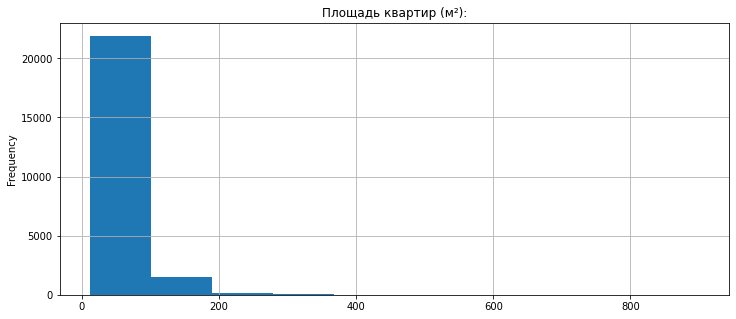

Числовое описание данных площади квартир: 
count    23699.000000
mean        60.348648
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900002
max        900.000000
Name: total_area, dtype: float64


In [44]:
# Построим гистограмму применим метод describe к столбцу 'total_area'

data['total_area'].plot(kind='hist', title='Площадь квартир (м²):', figsize=(12, 5), grid=True)
plt.show()
print('Числовое описание данных площади квартир: ')
print(data['total_area'].describe())

Мы видим, что преобладающее число объявлений имеют площадь **до 200 м²**, затем идет резкое снижение **до 400 м²** значение практически сливаются с нулем, **после 400 м²** на диаграмме значений мы не видим.

Взглянув на числовое описание данных, мы видим, что третий квартиль (75% данных) и максимальное значение очень сильно различаются: **69,9** и **900**, да и представить квартиру площадью 900 м² довольно сложно, хотя в России все возможно :) 

Давайте поближе взглянем на эти 3 диапазона, построим диаграммы с ними:

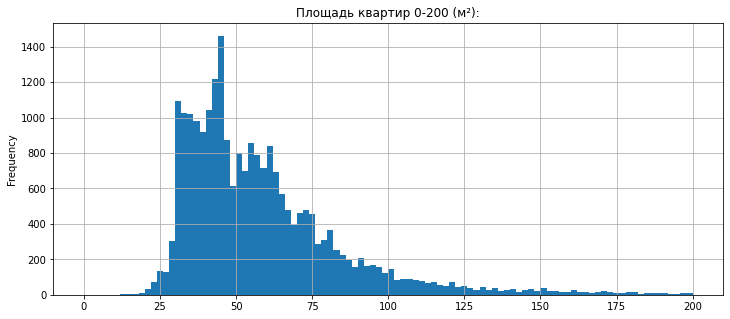

Числовое описание данных площади квартир 0-200 (м²): 
count    23473.000000
mean        58.185856
std         26.547556
min         12.000000
25%         40.000000
50%         51.900002
75%         69.000000
max        200.300003
Name: total_area, dtype: float64


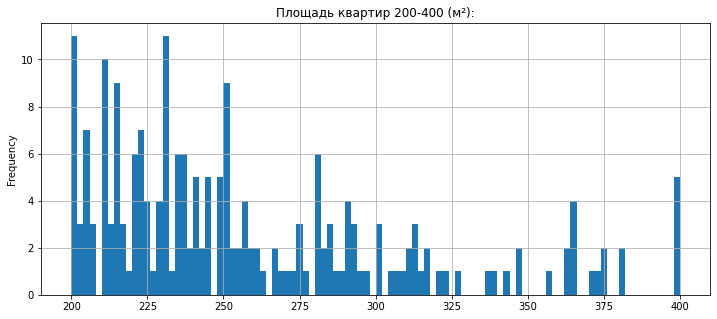

Числовое описание данных площади квартир 200-400 (м²): 
count    204.000000
mean     259.350037
std       50.820309
min      200.300003
25%      220.750000
50%      244.500000
75%      286.150009
max      400.000000
Name: total_area, dtype: float64


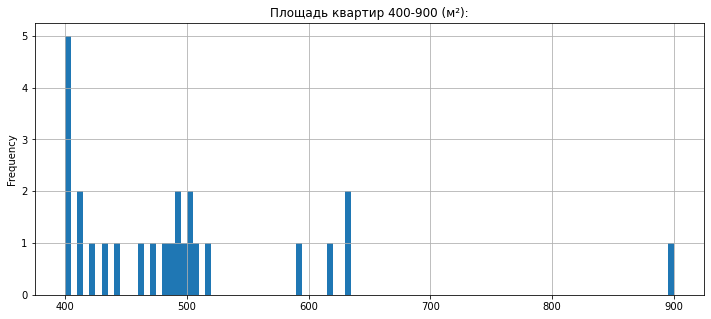

Числовое описание данных площади квартир 400-900 (м²): 
count     23.000000
mean     508.651276
std      110.195107
min      401.000000
25%      436.490005
50%      491.000000
75%      512.000000
max      900.000000
Name: total_area, dtype: float64


In [45]:
# разделим столбец 'total_area' на 3 группы и выведим их числовые описания

data['total_area'].plot(kind='hist', title='Площадь квартир 0-200 (м²):', figsize=(12, 5), range=(0, 200), bins=100, grid=True)
plt.show()
print('Числовое описание данных площади квартир 0-200 (м²): ')
print(data.query('total_area < 201')['total_area'].describe())

data['total_area'].plot(kind='hist', title='Площадь квартир 200-400 (м²):', figsize=(12, 5), range=(200, 400), bins=100, grid=True)
plt.show()
print('Числовое описание данных площади квартир 200-400 (м²): ')
print(data.query('200 < total_area < 401')['total_area'].describe())

data['total_area'].plot(kind='hist', title='Площадь квартир 400-900 (м²):', figsize=(12, 5), range=(400, 900), bins=100, grid=True)
plt.show()
print('Числовое описание данных площади квартир 400-900 (м²): ')
print(data.query('400 < total_area')['total_area'].describe())

Теперь мы видим аномальное минимальное значение **12 м²** - точно не квартира, по [ГОСТУ](https://gsps.ru/poleznoe/minimalnaya-ploshchad-pomeshcheniy-kvartiry.php) слишком маленькая площадь, может быть это комната или ошибка в данных.
Также мы видим резкий спад после **200 м²** и очень маленькое количество объявлений, всего **227 шт.**, на фоне всей выборке это около **1%** данных.

**Построим гистограмму стоимости квартир и выведим числовые характеристики столбца.**

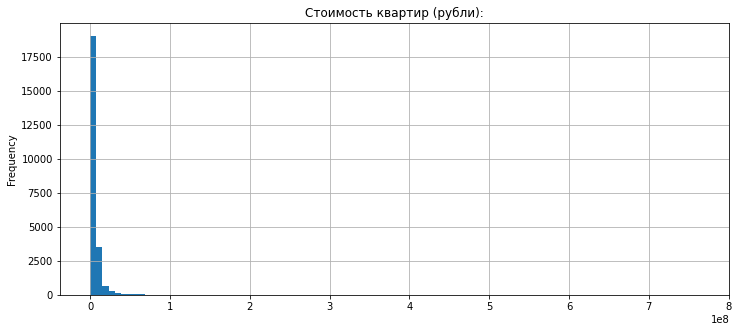

Числовое описание данных стоимости квартир: 
count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64


In [46]:
# Построим гистограмму применим метод describe к столбцу 'last_price'

data['last_price'].plot(kind='hist', title='Стоимость квартир (рубли):', figsize=(12, 5), bins=100, grid=True)
plt.show()
print('Числовое описание данных стоимости квартир: ')
print(data['last_price'].describe())


Большинство значений видно примерно **до 70 000 000 рублей**, после все значения сравнялись с нулем, мы их не видим.
Также мы видим минимальное значение равное **12 190 рублей**, что для квартиры очень дешево. Также мы видим максимальную цену квартиры равную **763 000 000 рублей**, взглянув на объявления по продажам квартир в Санкт-Петербурге от сервиса [Яндекс Недвижимость](https://realty.yandex.ru/sankt-peterburg/kupit/kvartira/?sort=PRICE_DESC), от марта 2022 года, мы видим:
* минимальная стоимость квартиры: **2 486 000** рублей;
* максимальная стоимость квартиры: **2 000 000 000** рублей, да уж :) и такое бывает

Давайте тоже стоимость разобьем на 3 группы по стоимости:
* **от 0 и до 50 000 000 рублей**;
* **от 50 000 000 рублей до 100 000 000**;
* **выше 100 000 000**.

Построим 3 гистограммы для них и выведим их числовые описания:

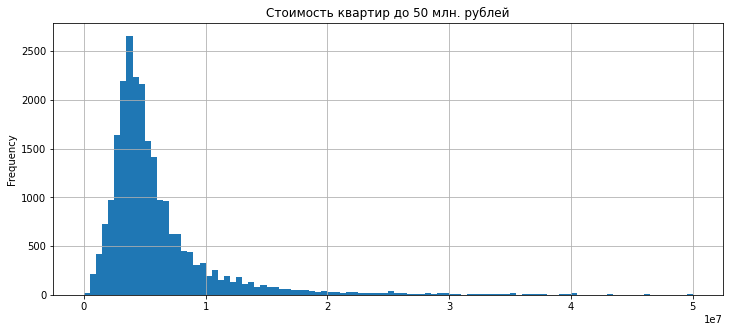

Числовое описание стоимости квартир до 50 млн. рублей
count    2.356100e+04
mean     5.986440e+06
std      4.918316e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.600000e+06
75%      6.700000e+06
max      4.996890e+07
Name: last_price, dtype: float64


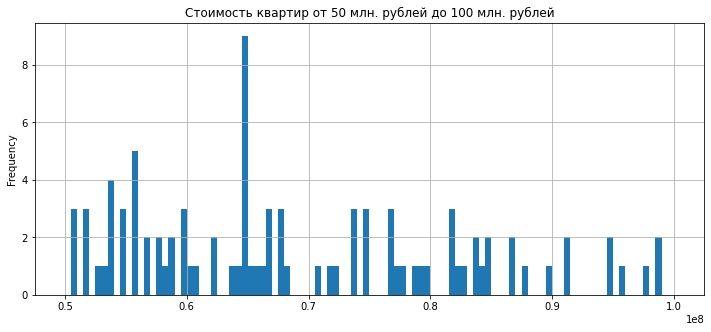

Числовое описание стоимости квартир от 50 млн. рублей до 100 млн. рублей:
count    9.400000e+01
mean     6.943266e+07
std      1.326138e+07
min      5.078800e+07
25%      5.812500e+07
50%      6.617500e+07
75%      7.925425e+07
max      9.900000e+07
Name: last_price, dtype: float64


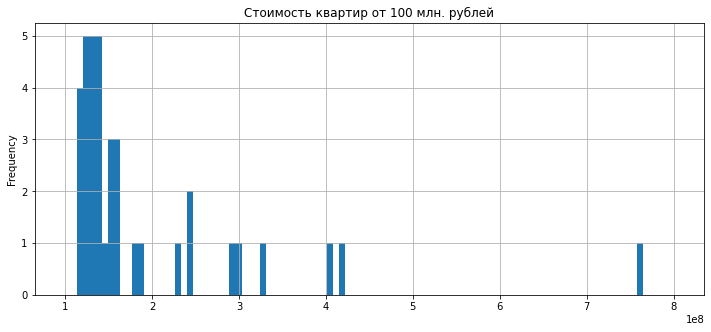

Числовое описание стоимости квартир от 100 млн. рублей:
count    3.700000e+01
mean     1.920268e+08
std      1.244244e+08
min      1.154900e+08
25%      1.300000e+08
50%      1.400000e+08
75%      1.908700e+08
max      7.630000e+08
Name: last_price, dtype: float64


In [47]:
# разделим столбец 'last_price' на 3 группы и выведим их числовые описания



# до 50 млн. рублей
(
data['last_price']
    .plot(kind='hist', 
          title='Стоимость квартир до 50 млн. рублей',
          range=(0,50000000),
          figsize=(12,5),
          bins=100,
          grid=True        
         )
)
plt.show()
print('Числовое описание стоимости квартир до 50 млн. рублей')
print(data.query('last_price < 50000000')['last_price'].describe())



# от 50 млн. рублей до 100 млн. рублей
(
data['last_price']
    .plot(kind='hist', 
          title='Стоимость квартир от 50 млн. рублей до 100 млн. рублей', 
          range=(50000001, 100000000),
          figsize=(12,5),
          bins=100,
          grid=True        
         )
)
plt.show()
print('Числовое описание стоимости квартир от 50 млн. рублей до 100 млн. рублей:')
print(data.query('50000001 < last_price < 100000000')['last_price'].describe())



# от 100 млн. рублей
(
data['last_price']
    .plot(kind='hist', 
          title='Стоимость квартир от 100 млн. рублей', 
          range=(100000000, 800000000),
          figsize=(12,5),
          bins=100,
          grid=True        
         )
)
plt.show()
print('Числовое описание стоимости квартир от 100 млн. рублей:')
print(data.query('last_price > 100000000')['last_price'].describe())

Видим **большое стандартное отклонение** у квартир до 50 млн. рублей, и **маленькое стандартное откронение** у квартир в диапазонах: от 50-100 млн. рублей и от 100 млн. рублей.

Еще бросается в глаза **максимальное значение** в этом столбце, идет очень большой разрыв до него, но его стоимость попадает в рамки разумного, на рынке есть квартиры и подороже. Минимальное значени тоже кажется аномалией, не может стоить квартира **12 190 рублей**, даже в Ленинградской области, ну или собственики этой квартиры альтруисты :)

В любом случае, **большинство квартир** продаются до 10 млн. рублей, а затем гистограмма идет на спад. Объявлений со стоимостью квартир выше 50 млн. рублей - **131**, это меньше **1%** от всех данных. 

**Построим гистограмму количества комнат и выведим числовые характеристики столбца.**

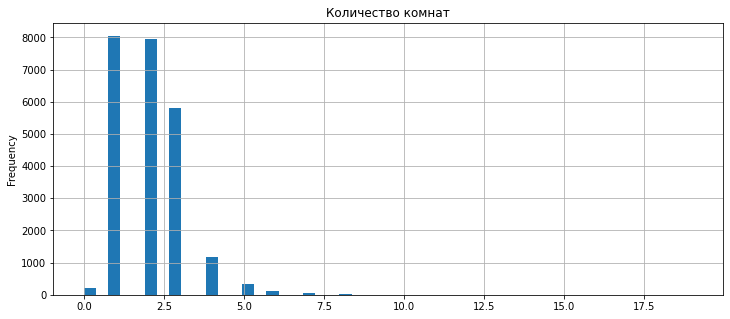

Числовое описание данных о комнатах в квартире: 
count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


In [48]:
# Построим гистограмму применим метод describe к столбцу 'rooms'

data['rooms'].plot(kind='hist', title='Количество комнат',bins=50, figsize=(12, 5), grid=True)
plt.show()
print('Числовое описание данных о комнатах в квартире: ')
print(data['rooms'].describe())

Мы видим количество комнат равное **0** - ранее мы предположили, что это квартиры-студии. Стандартное отклонение стремится к **1**, медиана и среднее арифметическое практически равны.

Также на гистограмме наблюдаем, что в большинстве объявлений количество комнат **равняется: 1, 2 или 3**. Начиная с 4-х комнатных квартир мы видим **спад** и после примерно 8 комнат на гистограмме не наблюдаем значений **до максимума** - 19 комнат. 

Давайте взглянем на гистограмму квартир с количеством комнат от 8 и до максимума.

Количество комнат больше 8


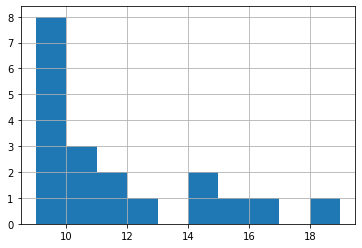

Количество объявлений, где комнат больше 8 равняется: 19


In [49]:
# построим гистограмму в диапазоне от 8 комнат и выше
# подсчитаем их количество

print('Количество комнат больше 8')
data.query('rooms > 8')['rooms'].hist()
plt.show()

print('''Количество объявлений, где комнат больше 8 равняется: {0}'''.format(len(data.query('rooms > 8'))))

Мы видим, что есть объявления с многокомнатными квартирами, их немного, всего **19**.

**Построим гистограмму высоты потолков и выведим числовые характеристики столбца.**

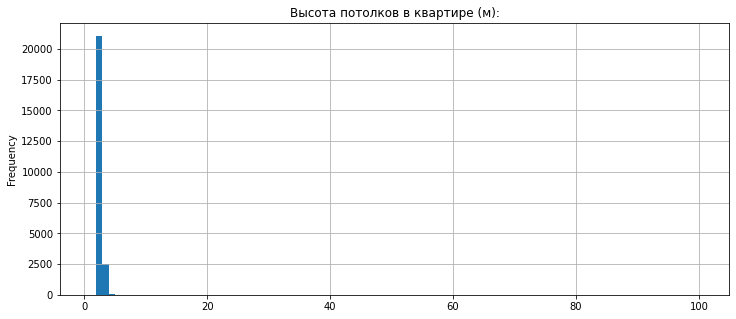

Числовое описание данных высоты потолков (м): 
count    23699.000000
mean         2.743758
std          0.987138
min          1.000000
25%          2.600000
50%          2.700000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64


In [50]:
# Построим гистограмму применим метод describe к столбцу 'ceiling_height'

data['ceiling_height'].plot(kind='hist', title='Высота потолков в квартире (м):', figsize=(12, 5), bins=100, grid=True)
plt.show()
print('Числовое описание данных высоты потолков (м): ')
print(data['ceiling_height'].describe())


Мы знаем, что [стандартная высота потолка в квартирах](https://www.ivd.ru/stroitelstvo-i-remont/potolok/standartnaya-vysota-potolkov-v-kvartire-kakoj-ona-byvaet-i-kak-ee-izmenit-42011) составляет **2,5-3,2 метров** в зависимости от года строительства и типа дома. Все остальные значения просто не могут быть, потому что **перечат ГОСТу** строительства жилой недвижимости, но не стоит забывать и о "старой постройке", где [высота потолков в сталинских домах](http://expert-home.net/standartnaya-vysota-potolkov-v-kvartire/) – от 3,20 м до 4 м.

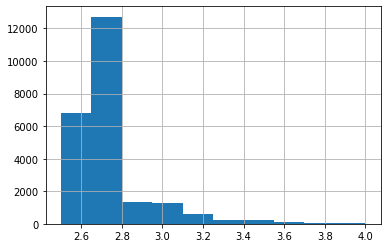

Числовое описание данных о высоте потолков в квартире в диапазоне 2,5-4 метра:


count    23551.000000
mean         2.713900
std          0.201126
min          2.500000
25%          2.600000
50%          2.700000
75%          2.700000
max          4.000000
Name: ceiling_height, dtype: float64

In [51]:
# Построим гистограмму применим метод describe к срезу столбца 'ceiling_height'

data.query('2.5 <= ceiling_height <= 4')['ceiling_height'].hist()
plt.show()
print('Числовое описание данных о высоте потолков в квартире в диапазоне 2,5-4 метра:')
data.query('2.5 <= ceiling_height <= 4')['ceiling_height'].describe()

**23 551** значений соответствует нашему диапазону, а остальные **148** не подходят, это меньше **1%** от всех данных. Стандартное отклонение близется к **0**, медиана и среднее арифметическое практически равны.

#### 3.2.2: Изучим время продажи
Построим гистограмму. Посчитаем среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

Для этого обратимся к столбцу `days_exposition` — сколько дней было размещено объявление (от публикации до снятия).

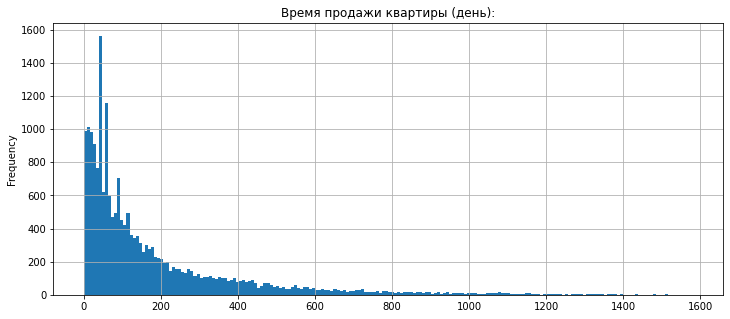

Числовое описание данных о времени продажи квартиры (день): 
count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64


In [52]:
# построим гистограмму применим метод describe к столбцу 'days_exposition'

data['days_exposition'].plot(kind='hist', title='Время продажи квартиры (день):',bins=200, figsize=(12, 5), grid=True)
plt.show()
print('Числовое описание данных о времени продажи квартиры (день): ')
print(data['days_exposition'].describe())

Видим много значений продажи квартиры за **1** день, я конечно, очень рад за людей, но слишком быстрая продажа квартиры кажется невозможной, ведь квартиру нужно придти посмотреть, затем проверить все документы в порядке или нет, в любом случае на это требуется время.

Давайте повнимательнее взглянем на гистограмму с диапазоном продажи квартиры до 1 месяца.

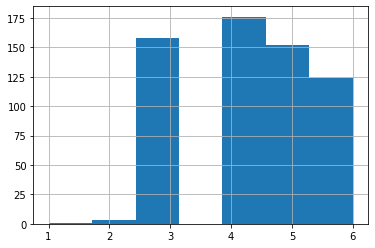

До 3 дней продали 162 квартир.


In [53]:
# построим гистограмму по срезу до 1 месяца
# подсчитаем сколько квартир продали за 3 дня

data.query('days_exposition < 7')['days_exposition'].hist(bins=7)
plt.show()
print('До 3 дней продали {0} квартир.'.format(len(data.query('days_exposition < 4'))))

Хотя все выглядит вполне правдоподобным, не так много значений равное **1 дню**, а за **3 дня** думаю квартиру могут купить, если действительно хотеть. Думаю этим данным можно верить, они кажутся логичными.


Давайте снова вернемся к нашей гистограмме, повторно выведем ее на экран.

<AxesSubplot:title={'center':'Время продажи квартиры (день):'}, ylabel='Frequency'>

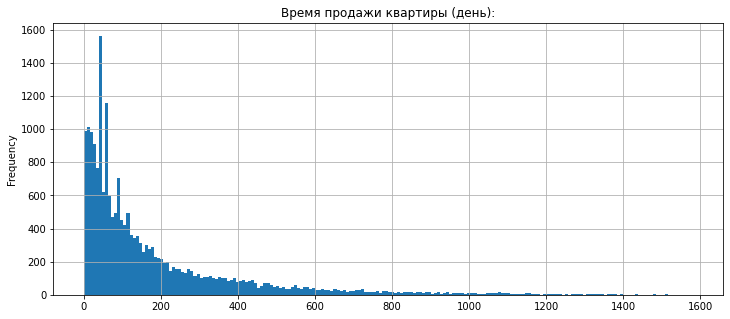

In [54]:
# повторно выведем гистограмму на экран

data['days_exposition'].plot(kind='hist', title='Время продажи квартиры (день):',bins=200, figsize=(12, 5), grid=True)

На ней мы видим несколько **выбросов** в данных и все они примерно в диапазоне до 180 дней, давайте их изучем.

<AxesSubplot:title={'center':'Время продажи квартиры в диапазоне до 180 дней:'}, ylabel='Frequency'>

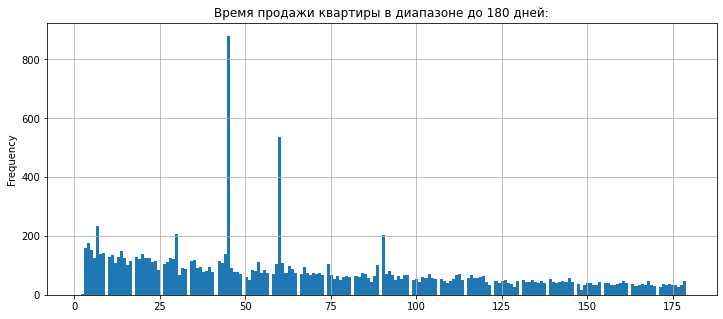

In [55]:
# построим гистограмму по срезу до 180 дней и поищем выбросы

(
data.query('days_exposition < 180')['days_exposition']
    .plot(kind='hist', 
          title='Время продажи квартиры в диапазоне до 180 дней:',
          bins=200, 
          figsize=(12, 5), 
          grid=True)
)    

Да теперь мы отчетливо их видим, 2 самых крупных выброса у нас в диапазоне от 40 и до 70 дней. Построим гистограмму в заданном диапазоне.

<AxesSubplot:title={'center':'Время продажи квартиры в диапазоне до 180 дней:'}, ylabel='Frequency'>

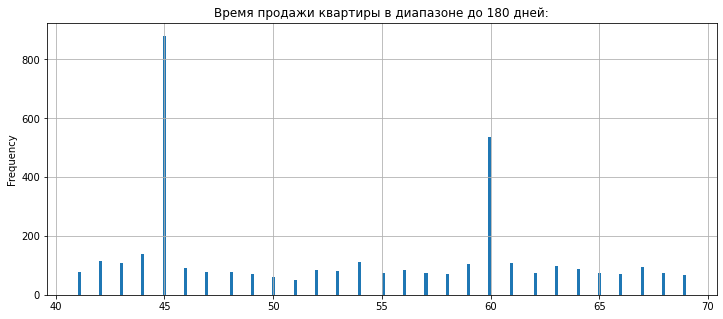

In [56]:
# построим гистограмму по срезу и поищем выбросы

(
data.query('40 < days_exposition < 70')['days_exposition']
    .plot(kind='hist', 
          title='Время продажи квартиры в диапазоне до 180 дней:',
          bins=200, 
          figsize=(12, 5), 
          grid=True)
) 

Два выброса у нас приходятся на **45** и **60** дни.

In [57]:
# подсчитаем количество выбросов

print(
'''
Количество выбросов на 45 день равно: {0};
Количество выбросов на 60 день равно: {1};

'''.format(len(data.query('44 < days_exposition < 46')), len(data.query('59 < days_exposition < 61')))
)


Количество выбросов на 45 день равно: 1018;
Количество выбросов на 60 день равно: 538;




**1 556** выбросов пришлось на 45 и 60 день, это меньше **1%** от всех данных.

Теперь давайте подробнее разберем числовое описание данных, нем известны следующие значения:
* **count** -   20518
* **mean** -    181
* **std** -     220
* **min** -     1
* **25%** -     45
* **50%** -     95
* **75%** -     232
* **max** -     1580

Отталкиваясь от этих данных, медиана у нас составляет - **95 дней**, именно столько в среднем занимает продажа квартиры. Среднее арифметическое у нас подверженно выбросам, поэтому на него ссылаться не будем.

Поэтому я предпологаю:
* если квартиру продали за **45** дней - будем считать быстрой продажей, это значение до 25% данных, (Q1);
* если продажа квартиры превышает **232** дня - будем считать это долгой продажей, это значение после 75% данных, (Q3).


#### 3.2.3: Избавимся от редких и выбивающихся значений


При изчении гистограмм мы уже столкнулись со значениями, которые выбиваются от общих, или попросту выбросы.

Для исследования стоимости квартиры нам необходимы не все данные, а лишь их часть, давайте подумаем, что влияет на стоимость квартиры:
* площадь квартиры - столбец `total area`;
* количество комнат, по идеии должна быть взаимосвясь с площадью - столбец `rooms`;
* расположение квартиры - столбецы - `city_сenters_nearest` и `airports_nearest`.
* этаж - столбец `floor`;
* стоимость - `last_price`.
* дата размещения - столбцы с датой, их несколько - `year_exposition`, `month_exposition` и `d_exposition`;
* населенный пункт - столбец `locality_name`.

Думаю, что это основные показатели при выборе квартиры, конечно есть еще и дополнитльные параметры, но не будем учитывать их в этом исследовании, потому что это уже всё индивидуально.

Раз мы определились со столбцами, давайте избавимся от редких и выбивающихся значений в них, для этого, мы создадим новую таблицу и назовем ее **good_data**, тем самым мы сохраним оригинальную таблицу, вдруг она понадобится нам вдальнейшем.


**Уберем редкие и выбивающиеся значения столбца `total_area`**

Построим диаграмму размаха и выведим цифровую информацию о данных этого столбца.

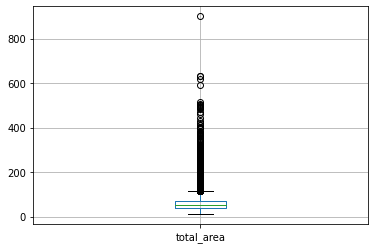

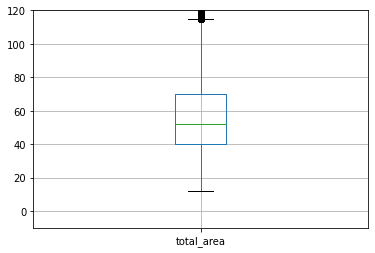

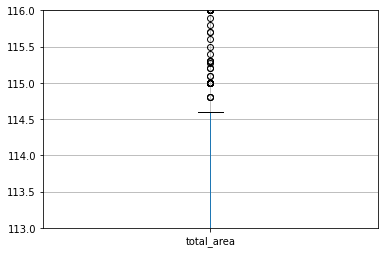

count    23699.000000
mean        60.348648
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900002
max        900.000000
Name: total_area, dtype: float64

In [58]:
# построим диаграмму размаха и выведим цифровую информацию о данных столбца 'total_area'

data.boxplot(column='total_area')
plt.show()
data.boxplot(column='total_area')
plt.ylim(-10, 120)
plt.show()
data.boxplot(column='total_area')
plt.ylim(113, 116)
plt.show()


data['total_area'].describe()

Видим, достаточно большое стандартное отклонение, это говорит о том что в наборе данных могут быть серьёзные аномалии или выбросы. В нашем случаем мы видим достаточно большой максимум значений и он сильно отличается от 75% данных. Также мы видим, что медиана стремится к нижнему усу - это говорит о том, что большая часть значений лежит именно там.

Я предлагаю отбросить все значение, которые не вошли в диаграмму размаха, для начала, давайте взглянем на их количество.

In [59]:
# подсчитаем сколько данных мы хотим отбросить

len(data.query('total_area > 114.6'))

1240

**1240** это меньшье **1%**, давайте создадим новый датафрейм **good_data** в который войдет срез по площади подходящий нам. Площадь квартир может быть и больше, к тому же, если говорить о Санкт-Петербурге, то здесь много построек "старого фонда", много коммуналок, поэтому разброс достаточно велик. В любом случае эти данные будем считать редкими, поэтому избавимся от них :) .

Мы могли бы учесть и [минимальную площадь квартиры](https://gsps.ru/poleznoe/minimalnaya-ploshchad-pomeshcheniy-kvartiry.php) равную **28 м²** и это для 1 к.кв., **но** давайте предположим, что это объявления о продаже не целой квартиры, а комнаты в комуналики, или все таки отстылка на старый фонд, раньше строили совершено по другим стандартам.

In [60]:
# создадим датафрем good_data в который войдут значения подходящие по площади

good_data = data.query('total_area < 114.7')

**Уберем редкие и выбивающиеся значения столбца `rooms`**

Построим диаграмму размаха и выведим цифровую информацию о данных этого столбца.

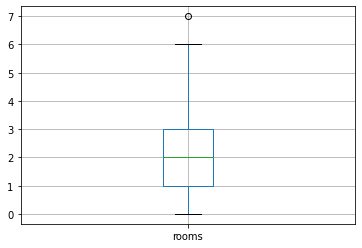

count    22459.000000
mean         1.948974
std          0.900211
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

In [61]:
# построим диаграмму размаха и выведим цифровую информацию о данных столбца 'rooms'

good_data.boxplot(column='rooms')
plt.show()

good_data['rooms'].describe()

Давайте и здесь сделаем срез и уберем значения, которые кажутся нам редкими. 

In [62]:
# сделаем срез по количествам комнат в квартире и уберем выбросы в новом датафрейме good_data

good_data = good_data.query('rooms < 7')

**Уберем редкие и выбивающиеся значения столбцов `city_сenters_nearest` и `airports_nearest`**.

Построим диаграмму размаха и выведим цифровую информацию о данных этих столбцов.

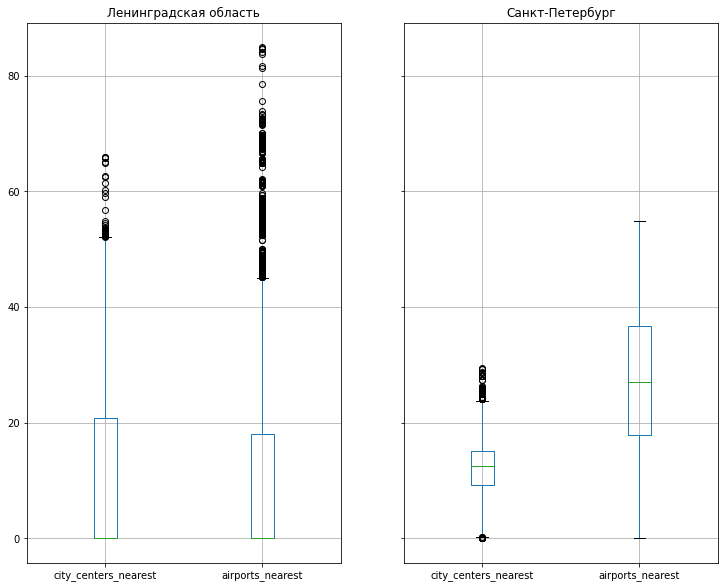

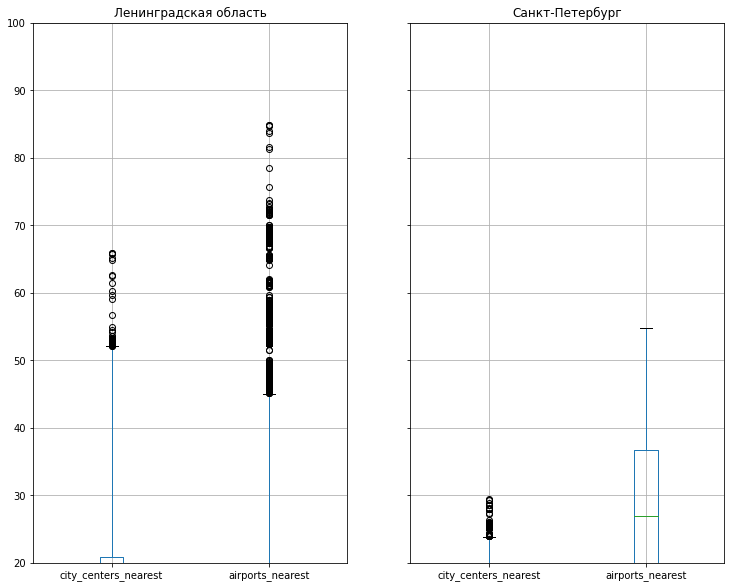


Числовое описание данных расстояния по Санкт-Петербургу:
       city_сenters_nearest  airports_nearest
count          14578.000000      14578.000000
mean              11.949014         27.953072
std                4.709330         11.899217
min                0.000000          0.000000
25%                9.150000         17.840000
50%               12.504000         26.980000
75%               15.069500         36.724000
max               29.493000         54.784000

Числовое описание данных расстояния по Ленинградской области:
       city_сenters_nearest  airports_nearest
count           7880.000000       7880.000000
mean               9.408627         10.398288
std               14.941863         18.185755
min                0.000000          0.000000
25%                0.000000          0.000000
50%                0.001000          0.001000
75%               20.866000         18.012000
max               65.968000         84.869000


In [63]:
# построим диаграмму размаха и выведим цифровую информацию о данных столбца 'rooms'

good_data.groupby('region').boxplot(column=['city_сenters_nearest', 'airports_nearest'], figsize=(12, 10))
plt.show()
good_data.groupby('region').boxplot(column=['city_сenters_nearest', 'airports_nearest'], figsize=(12, 10))
plt.ylim(20, 100)
plt.show()

print()
print('Числовое описание данных расстояния по Санкт-Петербургу:')
print(good_data.query('region == "Санкт-Петербург"')[['city_сenters_nearest', 'airports_nearest']].describe())
print()
print('Числовое описание данных расстояния по Ленинградской области:')
print(good_data.query('region == "Ленинградская область"')[['city_сenters_nearest', 'airports_nearest']].describe())

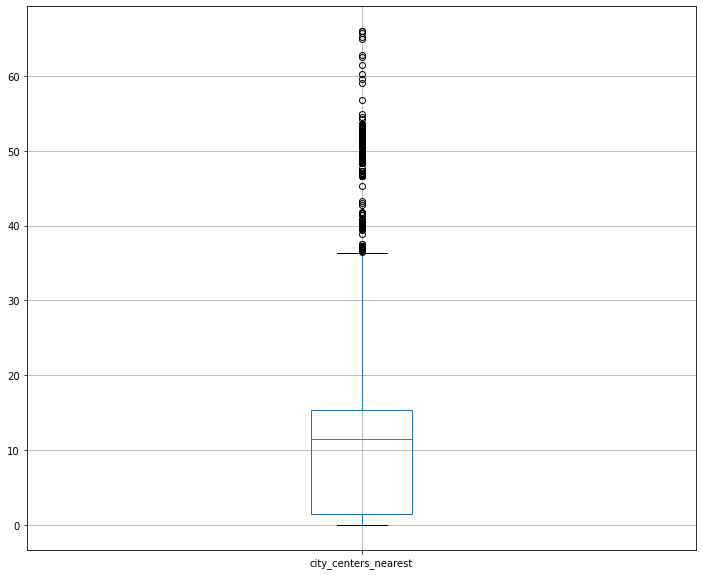

In [64]:
good_data.boxplot(column='city_сenters_nearest', figsize=(12, 10))
plt.show()

Если честно, то я бы оставил эти данные и не применял по ним срез, значения в них мне кажутся нормальными, достаточно взглянуть на карту Ленинградской области и Санкт-Петербурга, чтобы понять какая область огромная. К тому же я думаю, что их удаление, повлияет на результаты исследования.
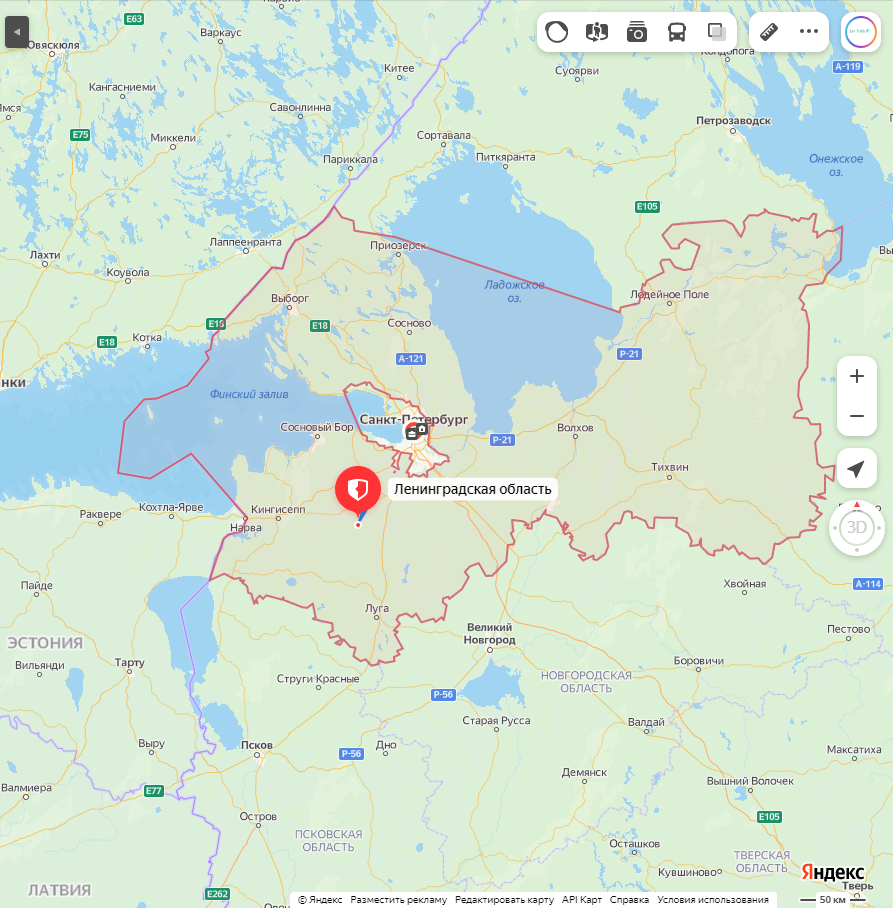

Взглянув на числовое описание, а именно на минимум и максимум, единственное значение, которое явный выброс это расстояние **300 км.**, если мне не изменяет память, это как раз **деревня Кудрово**, которая находится в Новгородской области, давайте избавимся только от нее и продолжим дальше.

Еще на всякий случай, проверим минимальное расстояние до центра по Ленинградской области, если вспомнить, то мы в эту категорию добавили все населенные пункты, и даже те, которые входят в состав Санкт-Петербурга, поэтому минимальные значения должны быть этих городов.


In [65]:
# проверим уникальные значения населенных пунктов

print('Выведем на экран населенные пункты, которые дальше 290 км. от центра:')
print(good_data.query('city_сenters_nearest > 290')['locality_name'].unique())
print()
print('Выведем на экран населенные пункты Ленинградской области, которые ближе 20 км. до центра:')
good_data.query('region == "Ленинградская область" and city_сenters_nearest < 20')['locality_name'].unique()

Выведем на экран населенные пункты, которые дальше 290 км. от центра:
[]

Выведем на экран населенные пункты Ленинградской области, которые ближе 20 км. до центра:


array(['посёлок Шушары', 'городской посёлок Янино-1', 'посёлок Парголово',
       'посёлок Мурино', 'Сертолово', 'деревня Кудрово', 'Коммунар',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кировск',
       'деревня Новое Девяткино', 'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'деревня Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск',
       'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Сясьстрой', 'деревня Старая', 'деревня Лесколово',
       'посёлок Новый Свет', 'Сланцы', 'село Путилово', 'Ивангород',
       'Мурино', 'Шлиссельбург', 'Никольское', 'поселок Новый Свет',
       'деревня Оржицы', 'деревня Кальтино', 'Куд

Да всё верно, давайте избавимся от объйвлений, которые расположены в Новгородской области и продолжим дальше.

In [66]:
# удалим из good_data все строки из населенного пункта 'деревня Кудрово'

good_data = good_data.query('locality_name != "деревня Кудрово"')

**Уберем редкие и выбивающиеся значения столбца `floor`**

Построим диаграмму размаха и выведим цифровую информацию о данных этого столбца.

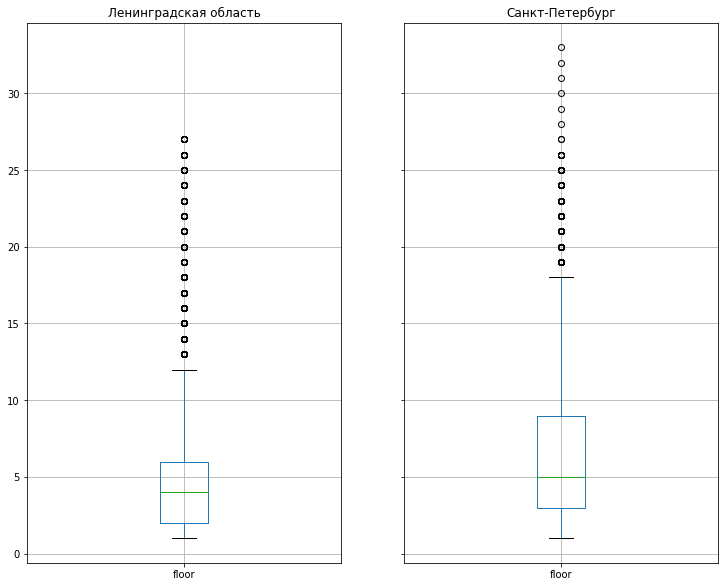


Числовое описание данных количества этажей в доме по Санкт-Петербургу:
count    14578.000000
mean         6.291329
std          4.932832
min          1.000000
25%          3.000000
50%          5.000000
75%          9.000000
max         33.000000
Name: floor, dtype: float64

Числовое описание данных количества этажей в доме по Ленинградской области:
count    7582.000000
mean        5.042205
std         4.648529
min         1.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        27.000000
Name: floor, dtype: float64


In [67]:
# построим диаграмму размаха и выведим цифровую информацию о данных столбца 'floor'

good_data.groupby('region').boxplot(column='floor', figsize=(12, 10))
plt.show()


print()
print('Числовое описание данных количества этажей в доме по Санкт-Петербургу:')
print(good_data.query('region == "Санкт-Петербург"')['floor'].describe())
print()
print('Числовое описание данных количества этажей в доме по Ленинградской области:')
print(good_data.query('region == "Ленинградская область"')['floor'].describe())

Я бы тоже эти данные оставил, несмотря на результаты графика, их числовое описание схоже с действительным. Их удаление может повлиять на дальнейшее исследование, поэтому предлагаю их оставить.

**Уберем редкие и выбивающиеся значения столбца `last_price`**

Построим диаграмму размаха и выведим цифровую информацию о данных этого столбца.

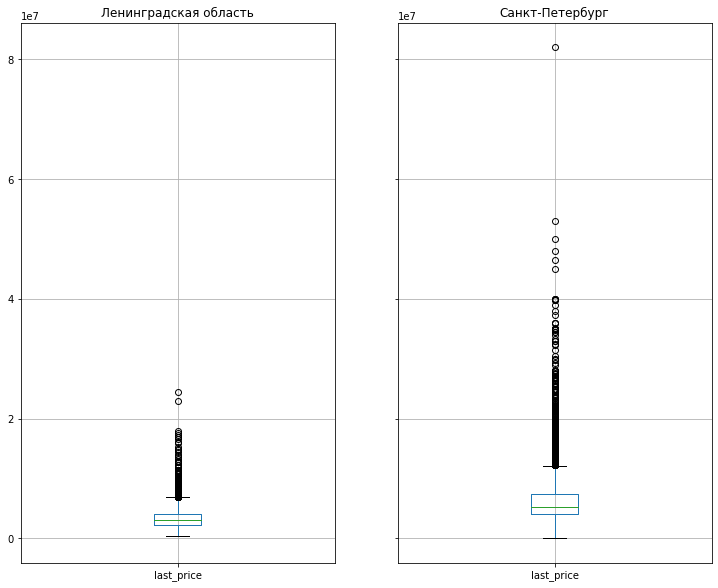


Числовое описание данных количества этажей в доме по Санкт-Петербургу:
count    1.457800e+04
mean     6.324596e+06
std      3.630702e+06
min      1.219000e+04
25%      4.130000e+06
50%      5.300000e+06
75%      7.349250e+06
max      8.200000e+07
Name: last_price, dtype: float64

Числовое описание данных количества этажей в доме по Ленинградской области:
count    7.582000e+03
mean     3.393391e+06
std      1.733378e+06
min      4.300000e+05
25%      2.300000e+06
50%      3.110000e+06
75%      4.150000e+06
max      2.441290e+07
Name: last_price, dtype: float64


In [68]:
# построим диаграмму размаха и выведим цифровую информацию о данных столбца 'last_price'

good_data.groupby('region').boxplot(column='last_price', figsize=(12, 10))
plt.show()


print()
print('Числовое описание данных количества этажей в доме по Санкт-Петербургу:')
print(good_data.query('region == "Санкт-Петербург"')['last_price'].describe())
print()
print('Числовое описание данных количества этажей в доме по Ленинградской области:')
print(good_data.query('region == "Ленинградская область"')['last_price'].describe())

Цена эта такая величина, которую не предугадать, поэтому я предлагаю избавится только от самых необычайно дорогих квартир:
* в Санкт-Петербурге необычайно дорогим посчитаем квартиры дороже **40 млн. рублей**;
* в Ленинградской области необычайно дорогим посчитаем квартиры дороже **20 млн. рублей**.

Дополнительно на стоимость могут повлиять например дорогой ремонт в квартире, или если человек оставляет мебель. Такие параметры нам не отследить, поэтому избавимся от необычайно больших значений, а с остальными продолжим исследование.

In [69]:
# оставим в good_data квартиры не дороже 20 млн. по области и 40 млн. по СПб

good_data = good_data.query('(region == "Ленинградская область" and last_price < 20000000) or (region == "Санкт-Петербург" and 100000 < last_price < 40000000)')
    


Мы создали новый датафрейм **good_data** в который вошли следующие параметры квартир:
* квартиры площадью до **114,7 м²**;
* количество комнат в квартирах не превышает **6** включительно;
* расстояние до центра Санкт-Петербурга в диапазоне **200** км.;
* дома высотой **33** этажа включительно;
* стоимостью квартир:
* * в области не дороже **20 млн. рублей**
* * в Санкт-Петербурге не дороже **40 млн. рублей**.

Все дальнейшие исследование мы будем проводить опираясь на эти объявления, напомню, что нам надо выяснить: 
* 3.2.4: **Изучим**, какие факторы влияют на **стоимость** квартиры;
* 3.2.5: Сделаем **подборку из 10 населённых пунктов** с самой высокой и низкой стоимостью жилья;
* 3.2.6: **Изучим стоимость** квартир **в центре** Санкт-Петербурга, узнаем как меняется стоимость от удаленности от центра, определим **сегмент** квартир в центре города;
* 3.2.7: **Изучим сегмент** квартир в центре города.

**Уберем редкие и выбивающиеся значения столбца `ceiling_height`**

Ранее мы заполняли пропуски на **[стандартную высоту потолка в квартирах](https://www.ivd.ru/stroitelstvo-i-remont/potolok/standartnaya-vysota-potolkov-v-kvartire-kakoj-ona-byvaet-i-kak-ee-izmenit-42011)**, которая составляет **от 2,5 до 3,2 метров** в зависимости от года строительства и типа дома. 

Но не стоит забывать, что речь идет о Санкт-Петербурге, а в этом городе есть старые постройки, где высота потолков [доходит до 4 м](http://expert-home.net/standartnaya-vysota-potolkov-v-kvartire/).

Давайте построим диаграмму размаха и выведим цифровую информацию о данных столбца 'last_price'

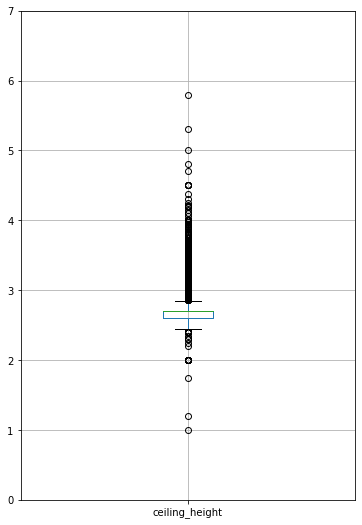


Числовое описание данных столбца о высоте потолков в квартире:
count    22149.000000
mean         2.729127
std          1.014554
min          1.000000
25%          2.600000
50%          2.700000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64


In [70]:
# построим диаграмму размаха и выведим цифровую информацию о данных столбца 'last_price'

good_data.boxplot(column='ceiling_height', figsize=(6, 9))
plt.ylim(0, 7)
plt.show()


print()
print('Числовое описание данных столбца о высоте потолков в квартире:')
print(good_data['ceiling_height'].describe())


Видим, что высота потолков выходит за рамки нормального значения, которое как вы допустили выше могут составлять от 2,5 до 4 метров приблизительно, от этих значений и давайте будет отталкиваться в будущем.

Дополнительное мы наблюдаем очень низкие и высокие значение по высоте, которые не могут быть возможными, как и исходя из ГОСТов по строительству, так и из логических рассуждений.

Оставим объявления у которых высота потолков в диапазоне **2,5 - 4** метра.

In [71]:
# оставим в good_data объявления с высотой потолков 2,5-4 метра

good_data = good_data.query('2.5 <= ceiling_height <= 4 ')

#### 3.2.4: Изучим, какие факторы влияют на стоимость квартиры

Ответим на следующие вопросы:
* зависит ли цена от площади, числа комнат, удалённости от центра; 
* зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом; 
* зависимость от даты размещения: дня недели, месяца и года.

Взглянем на корреляцию стоимости к перечисленным выше параметрам.


In [72]:
# первым делом округлим стоимость до млн. рублей, это упростит построение графиков
# Спасибо Саше за совет :)

good_data['last_price'] = good_data['last_price'] / 1000000

In [73]:
# поищем взаимосвясь между стоимость и другими параметрами

print('Проверим взаимосвязь без учета расположения квартиры:')
display(good_data[['last_price',
                   'price_square_meter',
                   'total_area', 
                   'rooms', 
                   'city_сenters_nearest'
                  ]].corr()
)

     
print('Проверим взаимосвязь в Санкт-Петербурге:')
display(good_data
        .query('region == "Санкт-Петербург"')
        [['last_price',
                   'price_square_meter',
                   'total_area', 
                   'rooms', 
                   'city_сenters_nearest']].corr()
)     
     
print('Проверим взаимосвязь в Ленинградской области:')
display(good_data
        .query('region == "Ленинградская область"')
        [['last_price',
                   'price_square_meter',
                   'total_area', 
                   'rooms', 
                   'city_сenters_nearest']].corr()
)  


Проверим взаимосвязь без учета расположения квартиры:


,last_price,price_square_meter,total_area,rooms,city_сenters_nearest
last_price,1.000000,0.748999,0.696566,0.393872,0.017847
price_square_meter,0.748999,1.000000,0.115587,-0.113068,0.109088
total_area,0.696566,0.115587,1.000000,0.788313,-0.040930
rooms,0.393872,-0.113068,0.788313,1.000000,-0.027499
city_сenters_nearest,0.017847,0.109088,-0.040930,-0.027499,1.000000


Проверим взаимосвязь в Санкт-Петербурге:


,last_price,price_square_meter,total_area,rooms,city_сenters_nearest
last_price,1.000000,0.694888,0.739785,0.423184,-0.383830
price_square_meter,0.694888,1.000000,0.086231,-0.160860,-0.349102
total_area,0.739785,0.086231,1.000000,0.777210,-0.261615
rooms,0.423184,-0.160860,0.777210,1.000000,-0.176072
city_сenters_nearest,-0.383830,-0.349102,-0.261615,-0.176072,1.000000


Проверим взаимосвязь в Ленинградской области:


,last_price,price_square_meter,total_area,rooms,city_сenters_nearest
last_price,1.000000,0.670041,0.632036,0.377620,0.371772
price_square_meter,0.670041,1.000000,-0.093312,-0.253076,0.428874
total_area,0.632036,-0.093312,1.000000,0.820653,0.068596
rooms,0.377620,-0.253076,0.820653,1.000000,0.042974
city_сenters_nearest,0.371772,0.428874,0.068596,0.042974,1.000000


Давайте изучим коррелицию  и посмотрим какие параметры влияют на стоимость:
* в **общей** картине мы видим положительную корреляцию стоимости квартиры и двух параметров: стоимость квадратного метра и общую площадь квартиры, также мы можем видить что стоимость квадратного метра в отдельности не имеет взаимосвязи с другими параметрами, кроме стоимость;
* в **Санкт-Петербурге** ситуация менятеся, мы видим, что положительная корреляция стоимости и площади выше, а также небольшую отрицательную корреляцию стоимости и расстояния до центра. Что касается стоимости квадратного метра, то у него положительная корреляция только к самой стоимости соответственно, и небольшая отрицательная корреляция к расстоянию до центра.
* в **Ленинградской области** мы видим положительную корреляцию стоимости к площади и стоимости квадратного метра, и меньшую корреляцию стоимости к расстоянию до центра. 



Мы ранее заметили, что корреляция отличается если рассматривать отдельно два региона (Сантк-Петербург и Ленинградская область), далее мы рассмотрим **зависимость стоимости квартиры** от того, на каком **этаже расположена квартира**: первом, последнем или другом также по двум регионам для более точного представления.

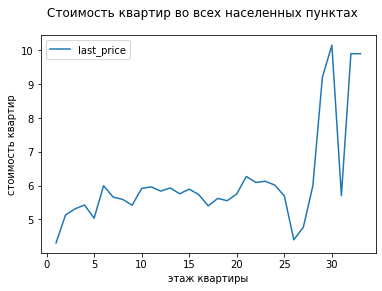

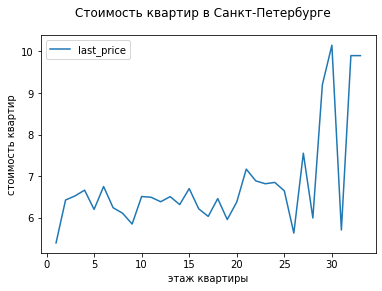

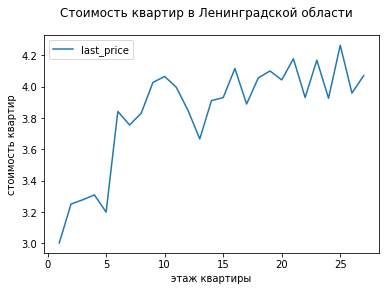

In [74]:
# построим 3 графика и поищем взаимосвязь между ср. стоимостью квартиры 
# и этажом на котором она расположена

(
    good_data
    .pivot_table(index='floor', values='last_price')
    .plot()
)
plt.suptitle('Стоимость квартир во всех населенных пунктах')
plt.xlabel('этаж квартиры')
plt.ylabel('стоимость квартир')
plt.show()



(
    good_data
    .query('region == "Санкт-Петербург"')
    .pivot_table(index='floor', values='last_price')
    .plot()
)
plt.suptitle('Стоимость квартир в Санкт-Петербурге')
plt.xlabel('этаж квартиры')
plt.ylabel('стоимость квартир')
plt.show()



(
    good_data
    .query('region == "Ленинградская область"')
    .pivot_table(index='floor', values='last_price')
    .plot()
)
plt.suptitle('Стоимость квартир в Ленинградской области')
plt.xlabel('этаж квартиры')
plt.ylabel('стоимость квартир')
plt.show()

Видим с вами взаимосвязь между стоимостью квартиры и этажностью. Квартиры выше 25 этажа заметно возрастают в цене, до 25 этажа стоимость несильно возрастает.

Давайте поищем зависимость стоимости от даты размещения: дня недели, месяца и года.

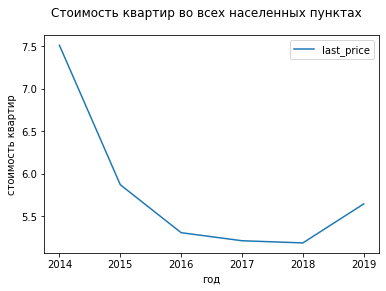

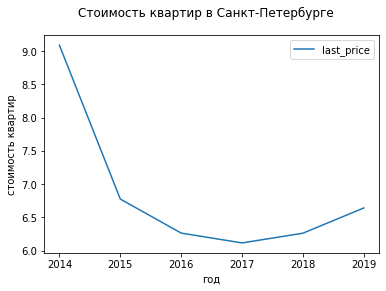

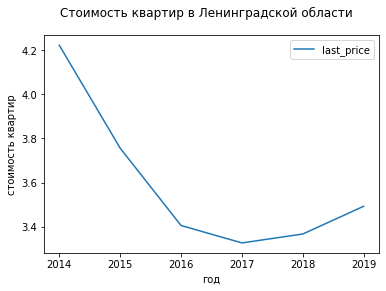

In [75]:
# построим 3 графика и поищем взаимосвязь между ср. стоимостью квартиры 
# и годом

(
    good_data
    .pivot_table(index='year_exposition', values='last_price')
    .plot()
)
plt.suptitle('Стоимость квартир во всех населенных пунктах')
plt.xlabel('год')
plt.ylabel('стоимость квартир')
plt.show()



(
    good_data
    .query('region == "Санкт-Петербург"')
    .pivot_table(index='year_exposition', values='last_price')
    .plot()
)
plt.suptitle('Стоимость квартир в Санкт-Петербурге')
plt.xlabel('год')
plt.ylabel('стоимость квартир')
plt.show()



(
    good_data
    .query('region == "Ленинградская область"')
    .pivot_table(index='year_exposition', values='last_price')
    .plot()
)
plt.suptitle('Стоимость квартир в Ленинградской области')
plt.xlabel('год')
plt.ylabel('стоимость квартир')
plt.show()

Если смотреть по годам, мы видим, что стоимость квартир с 2014 г. заметно падала, а с 2017-2018 гг. квартиры начали дорожать во всех регионах.

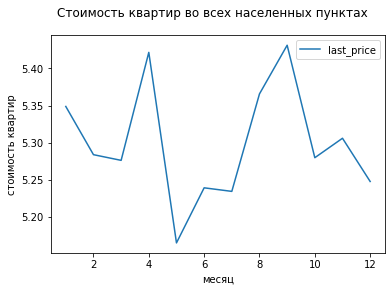

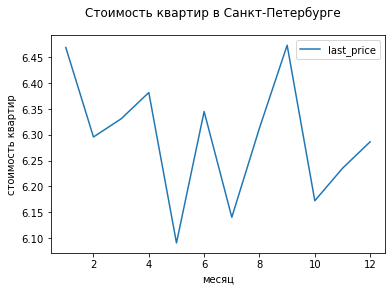

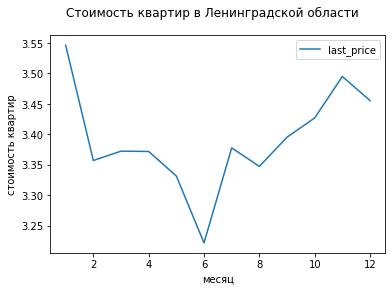

In [76]:
# построим 3 графика и поищем взаимосвязь между ср. стоимостью квартиры 
# и месяцами

(
    good_data
    .pivot_table(index='month_exposition', values='last_price')
    .plot()
)
plt.suptitle('Стоимость квартир во всех населенных пунктах')
plt.xlabel('месяц')
plt.ylabel('стоимость квартир')
plt.show()



(
    good_data
    .query('region == "Санкт-Петербург"')
    .pivot_table(index='month_exposition', values='last_price')
    .plot()
)
plt.suptitle('Стоимость квартир в Санкт-Петербурге')
plt.xlabel('месяц')
plt.ylabel('стоимость квартир')
plt.show()



(
    good_data
    .query('region == "Ленинградская область"')
    .pivot_table(index='month_exposition', values='last_price')
    .plot()
)
plt.suptitle('Стоимость квартир в Ленинградской области')
plt.xlabel('месяц')
plt.ylabel('стоимость квартир')
plt.show()

Мы видим, что осенью и весной стоимость квартир самая большая.

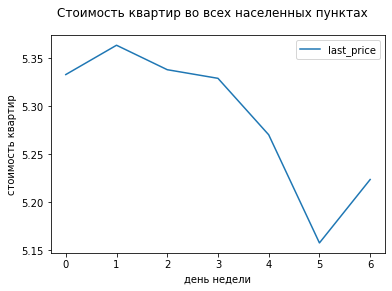

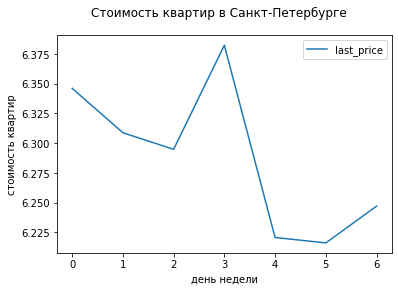

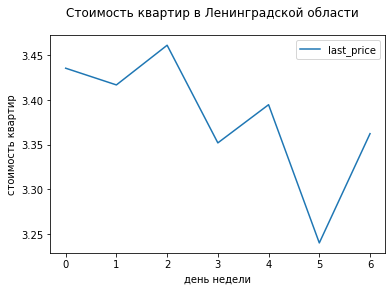

In [77]:
# построим 3 графика и поищем взаимосвязь между ср. стоимостью квартиры 
# и дням недели

(
    good_data
    .pivot_table(index='d_exposition', values='last_price')
    .plot()
)
plt.suptitle('Стоимость квартир во всех населенных пунктах')
plt.xlabel('день недели')
plt.ylabel('стоимость квартир')
plt.show()



(
    good_data
    .query('region == "Санкт-Петербург"')
    .pivot_table(index='d_exposition', values='last_price')
    .plot()
)
plt.suptitle('Стоимость квартир в Санкт-Петербурге')
plt.xlabel('день недели')
plt.ylabel('стоимость квартир')
plt.show()



(
    good_data
    .query('region == "Ленинградская область"')
    .pivot_table(index='d_exposition', values='last_price')
    .plot()
)
plt.suptitle('Стоимость квартир в Ленинградской области')
plt.xlabel('день недели')
plt.ylabel('стоимость квартир')
plt.show()

Самые дорогие объявления выкладывают в первой половине недели, во второй половине они дешевле.

**Мы рассмотрели объявления о продаже квартир по 3 категориям: все регионы, Санкт-Петербург, Ленинградская область.**


#### 3.2.5: Сделаем подборку из 10 населённых пунктов с самой высокой и низкой стоимостью жилья

Выберем **10** населённых пунктов с наибольшим числом объявлений. 

Посчитаем среднюю цену квадратного метра в этих населённых пунктах. 

Выделим населённые пункты с самой высокой и низкой стоимостью жилья.

In [78]:
# надо было сделать это раньше, моя ошибка, я забыл привести все значения 'locality_name' связанные с Мурино к единому регистру
# мы раньше видели такие варианты записа: Мурино, поселок Мурино, посёлок Мурино - меня смутил поселок, я подумал, что он не
# имеет отношение к городу Мурино, а сейчас вспомнив и проверив расстояние до центра, я понял, что это один и тот же город
# я переименную это здесь и сейчас :) понимая, что это неправильно, поэтому прошу прощения ))) 

good_data= good_data.replace(['посёлок Мурино', 'поселок Мурино'], 'Мурино')



In [79]:
# создадим переменную top_10_good_city в которой будет 10 городов с наибольшим числом объявлений
# отсортируем переменную top_10_good_city по кол. объявлений  
# переименуем столбцы
# сделаем срез, в который будут входить только первые 10

top_10_good_city = good_data.pivot_table(index='locality_name', values='total_images', aggfunc='count')
# display(top_10_good_city.sort_values(by='total_images', ascending=False).head(11))                    # убрал, чтоб не мешался
top_10_good_city.columns = ['count']
top_10_good_city = top_10_good_city.query('count >= 197')
top_10_good_city = top_10_good_city.sort_values(by='count', ascending=False)
top_10_good_city

,count
locality_name,
Санкт-Петербург,14498
Мурино,588
посёлок Шушары,437
Всеволожск,392
Пушкин,343
Колпино,335
посёлок Парголово,325
Гатчина,303
Выборг,225


Мы получили список с самым большим количеством объявлений, теперь давайте создадим новый датафрейм **top_10_good_data** в него войдут **объявления из 10 городов** с наибольшим количеством объявлений.

In [80]:
# создадим новый датафрем top_10_good_data в котором будут объявления только из топ 10 городов

top_10_good_data = good_data.query('locality_name in @top_10_good_city.index')

Теперь давайте сделаем следующее:
* посчитаем **среднюю** цену квадратного метра в этих населённых пунктах; 
* выделим населённые пункты с самой **высокой** и **низкой** стоимостью жилья.

Cредняя цена квадратного метра в топ 10 городов:



<AxesSubplot:title={'center':'Cредняя цена квадратного метра в топ 10 городов'}, ylabel='locality_name'>

<AxesSubplot:title={'center':'Максимальная стоимость квартир в топ 10 городов'}, ylabel='locality_name'>

<AxesSubplot:title={'center':'Минимальная стоимость квартир в топ 10 городов'}, ylabel='locality_name'>

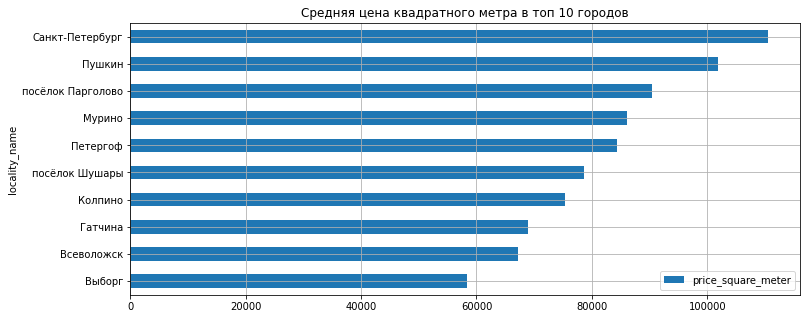

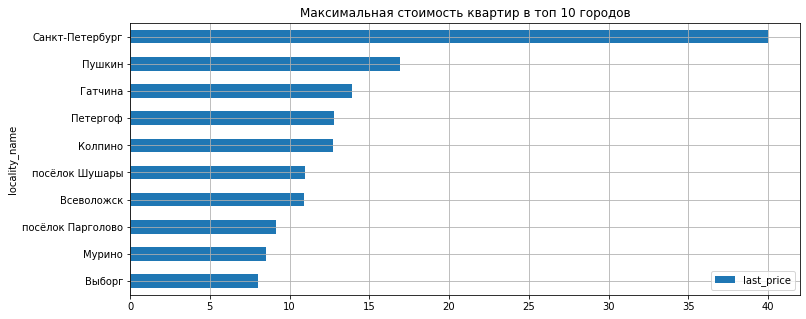

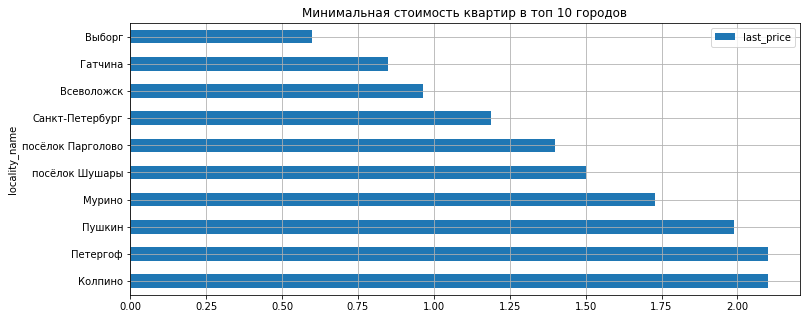

In [81]:
# посчитаем среднюю цену квадратного метра в этих населённых пунктах

print('Cредняя цена квадратного метра в топ 10 городов:')
print()
display(
top_10_good_data
    .pivot_table(index='locality_name', 
                 values='price_square_meter')
    .sort_values(by='price_square_meter', 
                 ascending=True)
    .plot(kind='barh',
          title='Cредняя цена квадратного метра в топ 10 городов',
          grid=True,
         figsize=(12, 5))
    
)   


display(
top_10_good_data
    .pivot_table(index='locality_name', 
                 values='last_price',
                aggfunc='max')
    .sort_values(by='last_price', 
                 ascending=True)
    .plot(kind='barh',
          title='Максимальная стоимость квартир в топ 10 городов',
          grid=True,
         figsize=(12, 5))
    
)   


display(
top_10_good_data
    .pivot_table(index='locality_name', 
                 values='last_price',
                aggfunc='min')
    .sort_values(by='last_price', 
                 ascending=False)
    .plot(kind='barh',
          title='Минимальная стоимость квартир в топ 10 городов',
          grid=True,
         figsize=(12, 5))
    
)   


Таким образом мы можем сказать, что среди 10 населённых пунктов с наибольшим числом объявлений:
* самый **дорогой** квадратный метр в **Санкт-Петербурге**;
* самый **дешевый** квадратный метр в **Выборге**;
* самые **дорогие** квартиры в **Санкт-Петербурге**;
* самые **дешевые** квартире в **Выборге**. 

#### 3.2.6: Изучим стоимость квартир в центре Санкт-Петербурга, узнаем как меняется стоимость от удаленности от центра, определим сегмент квартир в центре города

Выясним какая область входит в центр Санкт-Петербурга и рассчитаем среднюю цену для каждого километра. 

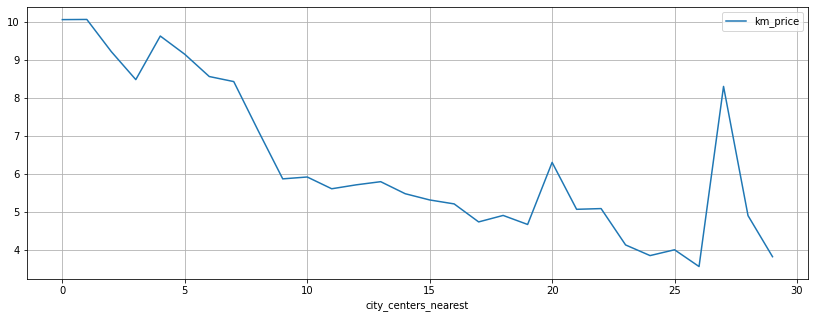

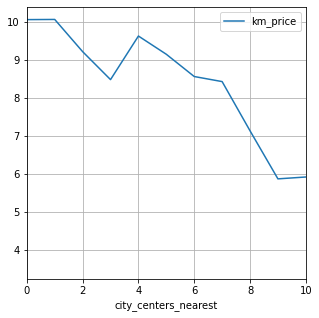

In [82]:
# удалим в столбце пропущенные значение, надо было раньше :( снова в последний момент делаю
# округлим столбец 'city_сenters_nearest' до целых значений
# рассчитаем среднюю цену для каждого километра в СПб и построим график
# сохраним в переменную spb_price_km
# построим график и узнаем в какую область входит центр

good_data = good_data.dropna(subset=['city_сenters_nearest'])
good_data['city_сenters_nearest'] = good_data['city_сenters_nearest'].astype(int)


spb_price_km = (
    good_data
    .query('region == "Санкт-Петербург"')
    .pivot_table(index='city_сenters_nearest', values='last_price')
    

           )
spb_price_km.columns = ['km_price']



spb_price_km.plot(figsize=(14,5), grid=True)
plt.show()
spb_price_km.plot(figsize=(5,5), grid=True, xlim=(0,10))
plt.show()



На графике видно, как стоимость сильно расстет на **9 км.**, именно этой точкой мы и будем считать диапазон центра

#### 3.2.7: Изучим сегмент квартир в центре города

Мы выяснили сегмент квартир в центре считается в диапазоне до **9** км. теперь проанализируем эту территорию и изучим следующие параметры: 
* площадь; 
* цена;
* число комнат; 
* высота потолков. 


Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделаем выводы. Отличаются ли они от общих выводов по всей базе?

Создадим переменную **spb_centre** с которой мы и будем работать далее, в нее будут входить квартиры в диапазоне до **9 км.**.

In [83]:
# создадим переменную spb_centre 


spb_centre = (
    good_data
    .query('region == "Санкт-Петербург" and city_сenters_nearest <= 9')
             )


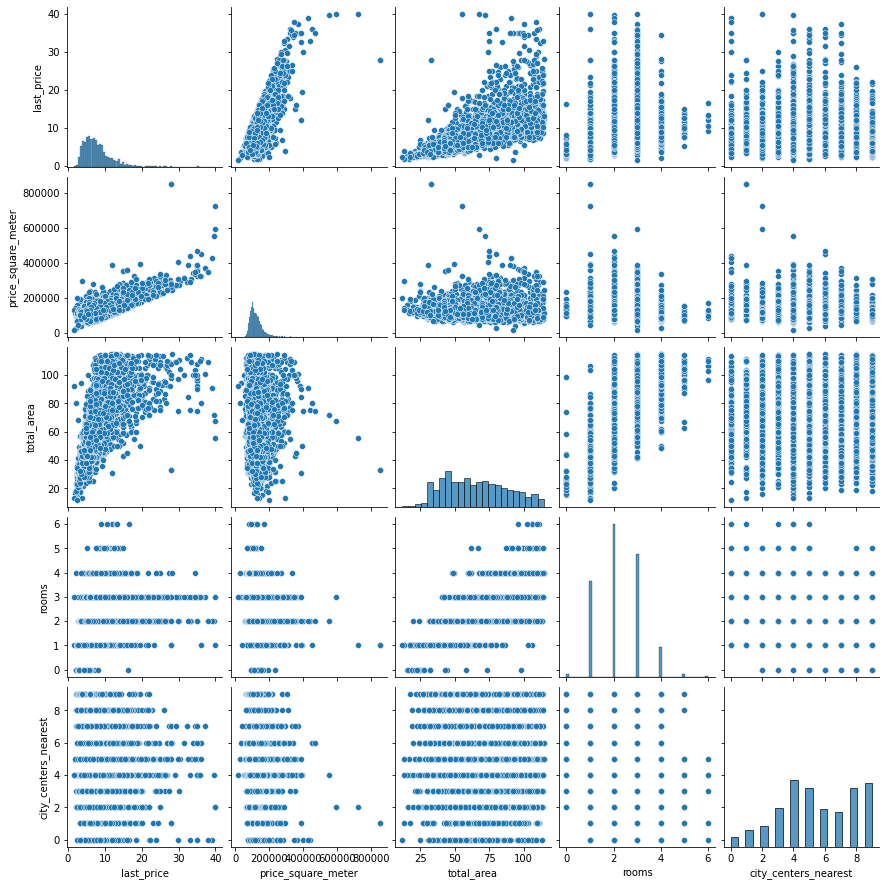

In [84]:
# изучим следующие параметры: площадь, цена, число комнат, высота потолков

(sns.pairplot(spb_centre[['last_price',
                   'price_square_meter',
                   'total_area', 
                   'rooms', 
                   'city_сenters_nearest']], 
                 )


)




In [85]:
# проверим корреляцию данных

spb_centre[['last_price',
            'price_square_meter',
            'total_area', 'rooms',
            'city_сenters_nearest']].corr()

,last_price,price_square_meter,total_area,rooms,city_сenters_nearest
last_price,1.000000,0.733896,0.662035,0.343750,-0.245317
price_square_meter,0.733896,1.000000,0.042976,-0.176866,-0.164601
total_area,0.662035,0.042976,1.000000,0.764762,-0.266621
rooms,0.343750,-0.176866,0.764762,1.000000,-0.205504
city_сenters_nearest,-0.245317,-0.164601,-0.266621,-0.205504,1.000000


В центре Санкт-Петербурга ситуация особо неотличается, **положительная корреляция** стоимости к общей площади, и **маленькая отрицательная коррелиция** к удаленности от центра. Можно сказать, что здесь все схоже с исследованиями которые провели ранее.

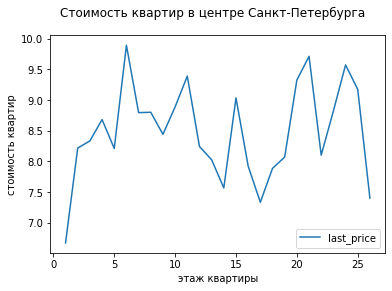

In [86]:
# построим 3 графика и поищем взаимосвязь между ср. стоимостью квартиры 
# и этажом на котором она расположена

(
    spb_centre
    .pivot_table(index='floor', values='last_price')
    .plot()
)
plt.suptitle('Стоимость квартир в центре Санкт-Петербурга')
plt.xlabel('этаж квартиры')
plt.ylabel('стоимость квартир')
plt.show()



Взаимосвязи между этажем на котором расположена квартира и ее стоимостью мы с вами не наблюдаем.

Давайте поищем зависимость стоимости от даты размещения: дня недели, месяца и года.

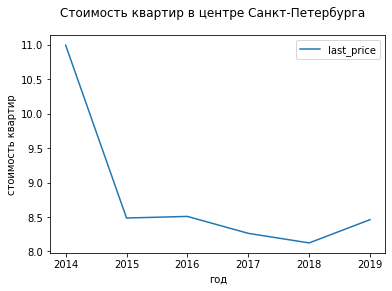

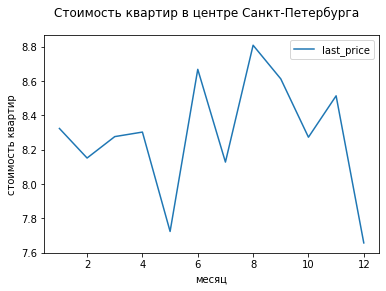

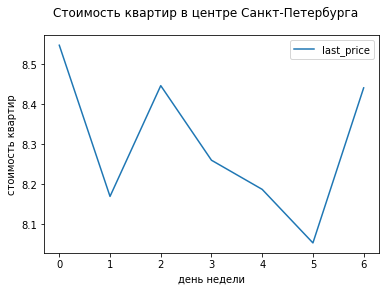

In [87]:
# построим 3 графика и поищем взаимосвязь между ср. стоимостью квартиры 
# и годом

(
    spb_centre
    .pivot_table(index='year_exposition', values='last_price')
    .plot()
)
plt.suptitle('Стоимость квартир в центре Санкт-Петербурга')
plt.xlabel('год')
plt.ylabel('стоимость квартир')
plt.show()

(
    spb_centre
    .pivot_table(index='month_exposition', values='last_price')
    .plot()
)
plt.suptitle('Стоимость квартир в центре Санкт-Петербурга')
plt.xlabel('месяц')
plt.ylabel('стоимость квартир')
plt.show()

(
    spb_centre
    .pivot_table(index='d_exposition', values='last_price')
    .plot()
)
plt.suptitle('Стоимость квартир в центре Санкт-Петербурга')
plt.xlabel('день недели')
plt.ylabel('стоимость квартир')
plt.show()



Впринципе отличительнных особенностей в центре мы не наблюдаем, лишь:
* этажность в центре не влияет на стоимость квартиры;
* пик стоимости приходится на первую половину года, а затем падает;


В остально всё схоже с исследованиями, которое мы проводили ранее по 3 группам: общая выборка, Санкт-Петербург и Ленинградская область.

## Вывод

In [88]:
print('''

Мы исследовали объявления о продаже квартиры за период с {0} год по {1} год.

Изначально у нас было {2} объявлений, но в данных были пропущенные значения и выбросы, 

после обработки и избавлении от выбросов у нас осталость {3} объявлений, именно 

это количество мы потом и стали использовать как основу для исследований.

Таким образом в исследовании мы пользовались {4}% от всех данных.

'''.format(
    data['year_exposition'].min(), 
    data['year_exposition'].max(),
    len(data),
    len(good_data),
    round(len(good_data) / len(data) * 100)
         ))

print('''

Данные мы поделили на 3 подгруппы:

1. Санкт-Петербург центр - в который входило {0} объявлений;

2. все данные по Санкт-Петербургу с учетом центра - в который входило {1} объявлений;

3. Ленинградская область, мы не стали учитывать города, которые входят в состав Санкт-Петербурга,
   а отнесли их к области - у нас получилось {2} объявлений.

'''.format(
    len(spb_centre),
    len(good_data.query('region == "Санкт-Петербург"')),
    len(good_data.query('region == "Ленинградская область"'))
           ))





Мы исследовали объявления о продаже квартиры за период с 2014 год по 2019 год.

Изначально у нас было 23699 объявлений, но в данных были пропущенные значения и выбросы, 

после обработки и избавлении от выбросов у нас осталость 22021 объявлений, именно 

это количество мы потом и стали использовать как основу для исследований.

Таким образом в исследовании мы пользовались 93% от всех данных.




Данные мы поделили на 3 подгруппы:

1. Санкт-Петербург центр - в который входило 4176 объявлений;

2. все данные по Санкт-Петербургу с учетом центра - в который входило 14498 объявлений;

3. Ленинградская область, мы не стали учитывать города, которые входят в состав Санкт-Петербурга,
   а отнесли их к области - у нас получилось 7523 объявлений.




**Цель исследования**: Нужно научиться определять рыночную стоимость объектов недвижимости.

В ходе исследования, мы выяснили, какие параметры влияют на стоимость квартиры:
* населенный пункт и расстояние до центра - немного;
* общая площадь квартиры и количество комнат - больше всего;
* этаж - незначительно;
* дата - немного.

Для установеления рыночной стоимости квартир нужно учитывать все эти параментры, далее мы с вами рассмотрим приблизительную рыночную стоимость квартир исходя из 3 групп:
* квартиры в центре Санкт-Петербурга - расстояние до центра до 9 км.;
* квартиры в Санкт-Петербурге - расстояние от центра от 9 км.;
* квартиры в Ленинградской области (все населенные пункты, даже те города, которые входят в состав Санкт-Петербурга).

In [89]:
# нам необходимо установить параметры, для этого мы установим мин и макс стоимость и площадь, укажем 
# среднею стоимость квадратного метра
# все квартиры будут разделены на кол-во комнат
# чтобы данные были более коректны мы все выше перечисленные значения рассчитаем отдельно для каждой 
# из 3-х групп (центр, СПб-не центр, Лен область) и для этого создадим 3 новых дф:
# final_price_centrem final_price_spb, final_price_l_o


# центр до 9 км

final_price_centre = (
    spb_centre
    .pivot_table(
        index = 'rooms',
        values = ['last_price', 'total_area'],
        aggfunc = ('min', 'max', 'mean') #честно говоря не понял, почему столбцы идут в другом порядке
                  )
)

final_price_centre.columns = ['max_price', 'mean_price', 'min_price', 'max_area','mean_area','min_area']                         
final_price_centre['price_square_meter'] = (
    final_price_centre['mean_price'] / final_price_centre['mean_area'] * 1000000)


# СПб от 9 км (центр не входит)

final_price_spb = (
    good_data
    .query('region == "Санкт-Петербург" and city_сenters_nearest > 9')
    .pivot_table(
        index = 'rooms',
        values = ['last_price', 'total_area'],
        aggfunc = ('min', 'max', 'mean') #честно говоря не понял, почему столбцы идут в другом порядке
                  )
)

final_price_spb.columns = ['max_price', 'mean_price', 'min_price', 'max_area','mean_area','min_area']                         
final_price_spb['price_square_meter'] = (
    final_price_spb['mean_price'] / final_price_spb['mean_area'] * 1000000)


# Лен. область


final_price_l_o = (
    good_data
    .query('region == "Ленинградская область"')
    .pivot_table(
        index = 'rooms',
        values = ['last_price', 'total_area'],
        aggfunc = ('min', 'max', 'mean') #честно говоря не понял, почему столбцы идут в другом порядке
                  )
)

final_price_l_o.columns = ['max_price', 'mean_price', 'min_price', 'max_area','mean_area','min_area']                         
final_price_l_o['price_square_meter'] = (
    final_price_l_o['mean_price'] / final_price_l_o['mean_area'] * 1000000)



Мы разбили данные на 3 группы: центр, Санкт-Петербург (не центр) и Ленинградская область.

Далее мы рассчитали следующие параметры:
* минимальная, максимальная и средняя стоимость квартиры;
* минимальная, максимальная и средняя общая площадь квартиры;
* стоимость квадратного метра.

Все данные мы сгруппирировали по количеству комнат в квартире. Таким образом мы получили 3 новых и итоговых датафрейма, в котором содержатся необходимые нам параметры:
* `final_price_centre`;
* `final_price_spb`;
* `final_price_l_o`.

Выведим их на экран:

In [90]:
# выведим  новых дф на экран

print('Рыночная стоимость квартир в центре Санкт-Петербурга (9 км.)')
print()
display(final_price_centre)

Рыночная стоимость квартир в центре Санкт-Петербурга (9 км.)



,max_price,mean_price,min_price,max_area,mean_area,min_area,price_square_meter
rooms,,,,,,,
0,16.300,4.443800,2.100,98.400002,32.692799,15.500000,135925.958876
1,39.900,5.632595,1.686,106.300003,40.276917,12.000000,139846.734029
2,39.744,8.244166,2.800,113.599998,61.608925,20.000000,133814.474873
3,39.990,10.018924,1.600,114.400002,80.731552,41.000000,124101.718307
4,34.551,10.105573,2.100,114.599998,95.615372,48.200001,105689.834581
5,14.900,10.079375,5.250,114.199997,99.143753,62.200001,101664.247012
6,16.550,12.415167,9.100,111.000000,105.283333,96.000000,117921.482286


In [91]:
# выведим  новых дф на экран

print('Рыночная стоимость квартир в Санкт-Петербурга (не центр)')
print()
display(final_price_spb)

Рыночная стоимость квартир в Санкт-Петербурга (не центр)



,max_price,mean_price,min_price,max_area,mean_area,min_area,price_square_meter
rooms,,,,,,,
0,5.000,3.237030,1.350,42.099998,27.316145,18.000000,118502.450738
1,14.400,4.160621,1.190,106.900002,37.608475,13.000000,110629.874430
2,24.432,5.798642,1.900,105.000000,55.030941,27.000000,105370.579195
3,25.500,7.040567,2.300,114.199997,72.013596,40.099998,97767.185258
4,20.000,6.770412,1.200,114.199997,76.936325,48.000000,88000.201829
5,12.780,7.717368,4.650,114.000000,91.842102,66.000000,84028.656234
6,14.000,10.432000,6.864,95.000000,94.500000,94.000000,110391.534392


In [92]:
# выведим  новых дф на экран

print('Рыночная стоимость квартир в Ленинградской области')
print()
display(final_price_l_o)

Рыночная стоимость квартир в Ленинградской области



,max_price,mean_price,min_price,max_area,mean_area,min_area,price_square_meter
rooms,,,,,,,
0,3.400,2.231488,0.94575,35.000000,25.694857,17.000000,86845.701772
1,10.965,2.767839,0.43000,96.500000,36.589127,15.000000,75646.482563
2,17.600,3.406929,0.43000,105.699997,52.469208,27.900000,64931.962100
3,18.000,4.376950,0.55000,114.500000,69.979828,40.799999,62545.882024
4,16.600,4.761051,0.99900,114.300003,78.813469,42.000000,60409.100468
5,8.100,4.961905,1.75000,114.000000,96.804764,40.000000,51256.824225
6,6.100,6.100000,6.10000,87.000000,87.000000,87.000000,70114.942529


Опираясь на эти параметры мы можем определить рыночную стоимость квартиры по её параметрам. В ходе исследования мы обнаружили положительную корреляцию стоимости к площади и соответственно количуству комнат. Опираясь на это, мы решили решили в итоге сделать подгруппу по количеству комнат и по ним уже производить рассчеты. 

**Описание** новых датафреймов:

* final_price_centre - в нем объявления о продаже квартиры только из центра СПб (**до** 9 км. до центра);
* final_price_spb - в нем объявления о продаже квартиры из СПб (**от** 9 км. до центра)
* final_price_l_o - в нем объявления о продаже квартиры из всей Ленинградской области, сюда также вошли некоторые города, которые входят в состав СПб (например: Колпино и т.п.)


**Описание столбцов:**
* `rooms` - количество комнат в квартире (шт.);
* `max_price` - максимальная стоимость квартиры (млн. руб.);
* `mean_price` - средняя стоимость квартиры (млн. руб.);
* `min_price` - минимальная стоимость квартиры (млн. руб.);
* `max_area` - максимальная площадь квартиры (м²);
* `mean_area` - средняя площадь квартиры (м²);
* `min_area` - минимальная площадь квартиры (м²);
* `price_square_meter` - стоимость 1 м² общей площади квартиры (тыс. рублей).


**Исследование закончено.**
